In [1]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from scipy import stats
import seaborn as sns

import warnings

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
import math
import sklearn.model_selection as ms
import sklearn.metrics as sklm

sns.set_style('whitegrid')
warnings.simplefilter(action='ignore')

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

fichier_1 = pd.read_csv('olist_customers_dataset.csv')
fichier_2 = pd.read_csv('olist_geolocation_dataset.csv')
fichier_3 = pd.read_csv('olist_order_items_dataset.csv')
fichier_4 = pd.read_csv('olist_order_payments_dataset.csv')
fichier_5 = pd.read_csv('olist_order_reviews_dataset.csv')
fichier_6 = pd.read_csv('olist_orders_dataset.csv')
fichier_7 = pd.read_csv('olist_products_dataset.csv')
fichier_8 = pd.read_csv('olist_sellers_dataset.csv')
fichier_9 = pd.read_csv('product_category_name_translation.csv')

In [3]:
print("Fichier 1, Lignes: ", fichier_1.shape[0])
print("Fichier 1, Colonnes: ", fichier_1.shape[1], "\n")
print("Fichier 2, Lignes: ", fichier_2.shape[0])
print("Fichier 2, Colonnes: ", fichier_2.shape[1], "\n")
print("Fichier 3, Lignes: ", fichier_3.shape[0])
print("Fichier 3, Colonnes: ", fichier_3.shape[1], "\n")
print("Fichier 4, Lignes: ", fichier_4.shape[0])
print("Fichier 4, Colonnes: ", fichier_4.shape[1], "\n")
print("Fichier 5, Lignes: ", fichier_5.shape[0])
print("Fichier 5, Colonnes: ", fichier_5.shape[1], "\n")
print("Fichier 6, Lignes: ", fichier_6.shape[0])
print("Fichier 6, Colonnes: ", fichier_6.shape[1], "\n")
print("Fichier 7, Lignes: ", fichier_7.shape[0])
print("Fichier 7, Colonnes: ", fichier_7.shape[1], "\n")
print("Fichier 8, Lignes: ", fichier_8.shape[0])
print("Fichier 8, Colonnes: ", fichier_8.shape[1], "\n")
print("Fichier 9, Lignes: ", fichier_9.shape[0])
print("Fichier 9, Colonnes: ", fichier_9.shape[1], "\n")

Fichier 1, Lignes:  99441
Fichier 1, Colonnes:  5 

Fichier 2, Lignes:  1000163
Fichier 2, Colonnes:  5 

Fichier 3, Lignes:  112650
Fichier 3, Colonnes:  7 

Fichier 4, Lignes:  103886
Fichier 4, Colonnes:  5 

Fichier 5, Lignes:  100000
Fichier 5, Colonnes:  7 

Fichier 6, Lignes:  99441
Fichier 6, Colonnes:  8 

Fichier 7, Lignes:  32951
Fichier 7, Colonnes:  9 

Fichier 8, Lignes:  3095
Fichier 8, Colonnes:  4 

Fichier 9, Lignes:  71
Fichier 9, Colonnes:  2 



In [4]:
dataSetFinal = pd.merge(fichier_1,fichier_6,on = ["customer_id"])
dataSetFinal = pd.merge(dataSetFinal,fichier_3, on = ["order_id"])
dataSetFinal = pd.merge(dataSetFinal,fichier_4, on = ["order_id"])
dataSetFinal = pd.merge(dataSetFinal,fichier_5, on = ["order_id"])
dataSetFinal = pd.merge(dataSetFinal,fichier_7, on = ["product_id"])
dataSetFinal = pd.merge(dataSetFinal,fichier_9, on = ["product_category_name"])

dataSetFinal.head(100)

customer_id                customer_unique_id  \
0   06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1   8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2   8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3   f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4   6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
5   fd3a0b1bd209f0e7d420c9c3d1127613  567ab47ca4deb92d46dbf54dce07d0a7   
6   fbd40c083aa8cddebb5265b2ba6aaf2e  f40ab89b622248b7ca125af4b486b887   
7   10558ef4afea173bfb5e2cbe3d5b0bb5  749943913a9851a39c9baf51877fbab6   
8   1c37c0f0cd1d88d46d9fc9494762abbd  432ecfa8b7b7ad2663c7abed0dc83c51   
9   20a452f528d487411fd7d3ebda1d0f20  31318a0597cd9d50ce4cfd03c80fe780   
10  20a452f528d487411fd7d3ebda1d0f20  31318a0597cd9d50ce4cfd03c80fe780   
11  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
12  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
13  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
14  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
15  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
16  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
17  d3286ca43aa21423c6045b2806ca8e56  acd02fc85cf6339f896c161af2b6abcd   
18  c49bec5f74f0413130abdaed8e7621d0  67d6f91d256bdf128fc960a166f413d5   
19  0058ebe2dc136d918dd001968cfa5903  9e8993ba2665307b71bd1641c2e1cb3d   
20  0058ebe2dc136d918dd001968cfa5903  9e8993ba2665307b71bd1641c2e1cb3d   
21  f91eb13e253823f25cf9a20fc2d08f56  1c91f8d50340522dd6601237ad13afff   
22  8bf4f9552bc2db14d6195bbbb5131941  b428f59c73c1bbeb3584744b4570654b   
23  70bc2fe12d0580eb8336285500defe0e  c71792e0cbb396e0a77258f474d971ab   
24  11eee0e62a0b905cf878ff13c8aec4a0  7dd466ce70871be5aba0ea1a43df6021   
25  11eee0e62a0b905cf878ff13c8aec4a0  7dd466ce70871be5aba0ea1a43df6021   
26  cf4dc8d4be7642c7c05a73188a3d8c1c  35c0fa6f2e6bbb3576e725d22e1066b8   
27  d24a0f00aa18133811d0aa666da75ff6  14803be716853016918954f7ef189abd   
28  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
29  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
30  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
31  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
32  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
33  9202f01b2ebd095e340abd57e02b65e6  7fcf7dc77013a88b9eef97c288b3eb8d   
34  ac318397fb90e64c9a724a3fc61ef587  aaad33c5051196b5e73c7d65b9072e1d   
35  ac318397fb90e64c9a724a3fc61ef587  aaad33c5051196b5e73c7d65b9072e1d   
36  15359860c7341b2f6b12259d83c2e697  52d8a619dff23c2985434b25e9862ff8   
37  454c1eeaac06aef9e44e33d80b12bdbc  fa516425f2667bd8a5a409f9112e663d   
38  f1c8bca25ab72158e4721761b51d7256  75fd60b26fd8ec7f00dff3a5dede2c77   
39  645d4fd3f4546d7c9592576665711186  661ada8f1f0f348790c6b9ce57d51f55   
40  b9c05cfc28f1dd72313d61b139faab45  46587168f28103639ae8249f19b53043   
41  97ee81fede5757f1ab031e83d1a59f56  452fab1c62b178922fc011b0eb89c1b9   
42  97ee81fede5757f1ab031e83d1a59f56  452fab1c62b178922fc011b0eb89c1b9   
43  44e25679aa4d5d2ef5103f6b0174a586  613259d64ba972e49dc25b019b7918c3   
44  90714b0e62fe1fbd304fb45fd644ebdd  c666e59a2d3ced923880461526113d38   
45  ab156e9202420e577b405360a7b29cbc  b52b8debdefe66d4c0d7f44d9b4ff088   
46  ab156e9202420e577b405360a7b29cbc  b52b8debdefe66d4c0d7f44d9b4ff088   
47  7f449435f005ccdf1808f0bc6e4ded34  1ad20cb261e24038bc33ebaca6ddad62   
48  a2a34d52a5ca3c214067d8d87f6ddf21  ca9522ba7a7c70fc06b2a82471681ce4   
49  a2a34d52a5ca3c214067d8d87f6ddf21  ca9522ba7a7c70fc06b2a82471681ce4   
50  95fd46b89a4174004b2407d01069a6d7  dff712b02bbaed94147ee35e29296897   
51  8039f8288f456b82f0c97e6063d003be  5f422502464dac44a0a981f29ec64043   
52  12dbbea9f6b7ebe93cc5dfcf0cfe55af  e8198977f57313464a8c3fd122c40050   
53  12dbbea9f6b7ebe93cc5dfcf0

In [5]:
dataSetFinal.shape

(116581, 37)

In [6]:
print(len(dataSetFinal["order_id"].unique()))

97255


In [7]:
print(len(dataSetFinal["customer_id"].unique()))

97255


In [8]:
print(len(dataSetFinal["customer_unique_id"].unique()))

94087


## Analyse des valeurs manquantes

In [9]:
!pip install missingno

<AxesSubplot:>

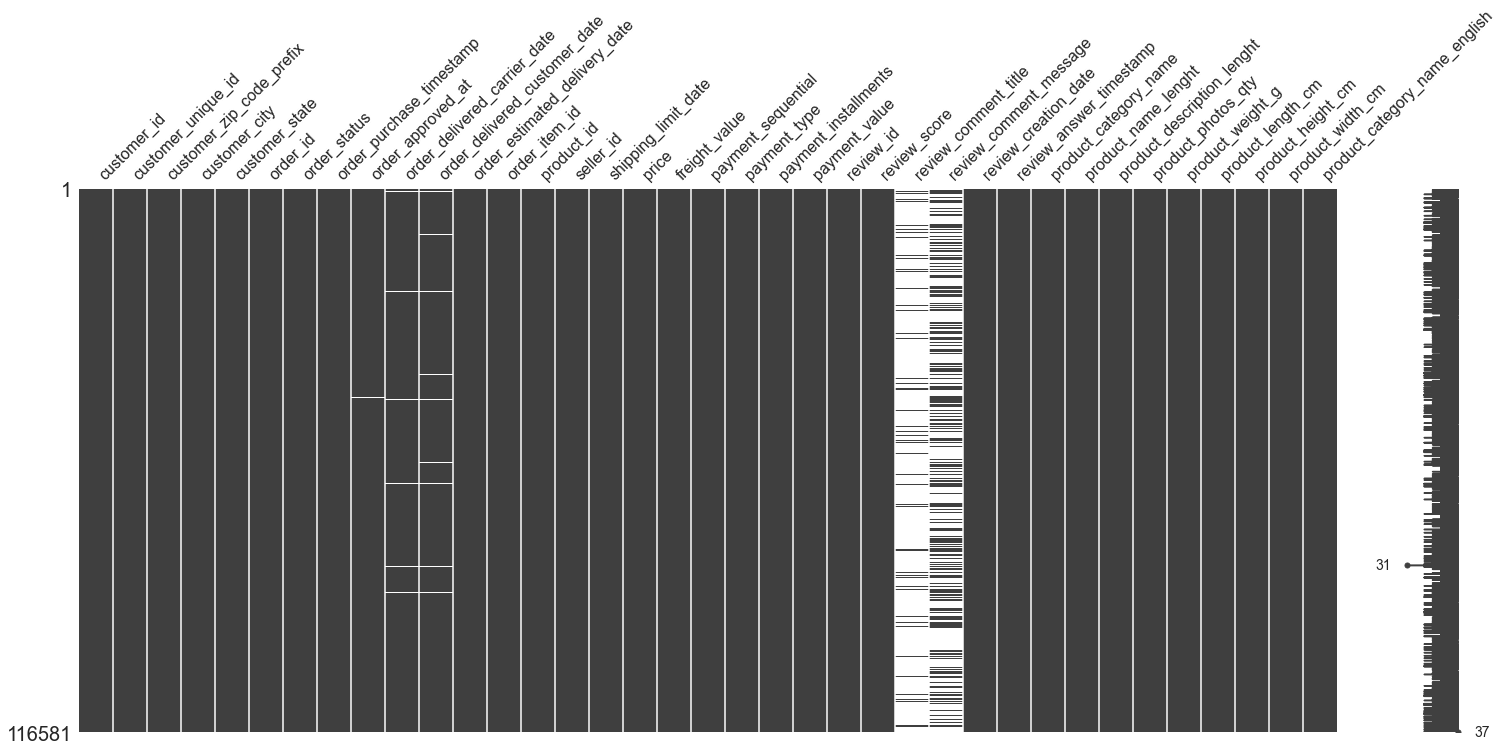

In [10]:
import missingno as msno
%matplotlib inline
msno.matrix(dataSetFinal)

In [11]:
def msv_1(data, thresh=20, color='black', edgecolor='black'):
    height = 3
    width = 15
    plt.figure(figsize=(width, height))
    percentage = (data.isnull().mean()) * 100
    percentage = percentage.sort_values(ascending=False)
    percentage.plot.bar(color=color, edgecolor=edgecolor)
    plt.axhline(y=thresh, color='r', linestyle='-')
    plt.title('Missing values percentage per column',
              fontsize=20, weight='bold')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh+12.5,
             f'Columns with more than {thresh}% missing values',
             fontsize=12, color='crimson',
             ha='left', va='top')
    plt.text(len(data.isnull().sum()/len(data))/1.7, thresh - 5,
             f'Columns with less than {thresh}% missing values',
             fontsize=12, color='green',
             ha='left', va='top')
    plt.xlabel('Columns', size=15, weight='bold')
    plt.ylabel('Missing values percentage')
    plt.yticks(weight='bold')
    return plt.show()

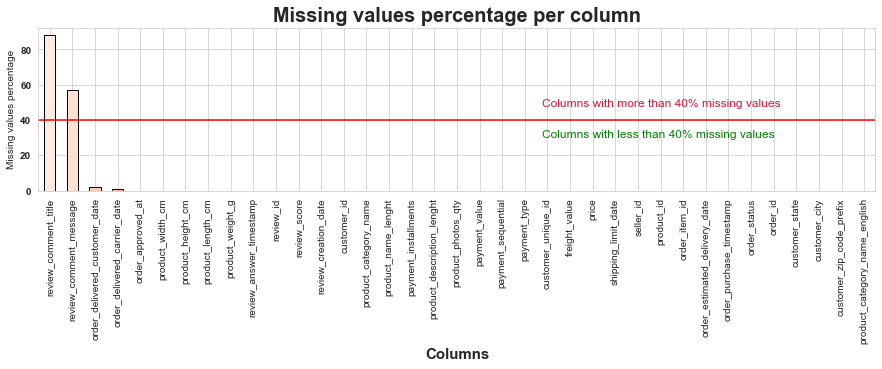

In [12]:
msv_1(dataSetFinal, 40, color=sns.color_palette('Reds', 15))

### Pour la colonne "order_delivered_customer_date" si la valeur est NaN alors ça veut dire que la commande n'a pas été finalisée. On va donc supprimer la ligne correspondante. 

In [13]:
dataSetFinal = dataSetFinal.dropna(subset=['order_delivered_customer_date'])

In [14]:
dataSetFinal.shape

(114066, 37)

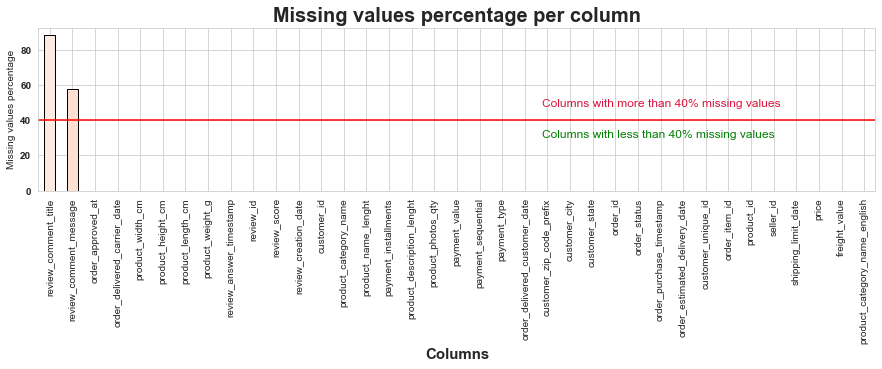

In [15]:
msv_1(dataSetFinal, 40, color=sns.color_palette('Reds', 15))

### Puis on va supprimer les colonnes contenant au moins 40% de valeurs manquantes

In [16]:
dataSetFinal = dataSetFinal.drop(['review_comment_title'], axis=1)
dataSetFinal = dataSetFinal.drop(['review_comment_message'], axis=1)

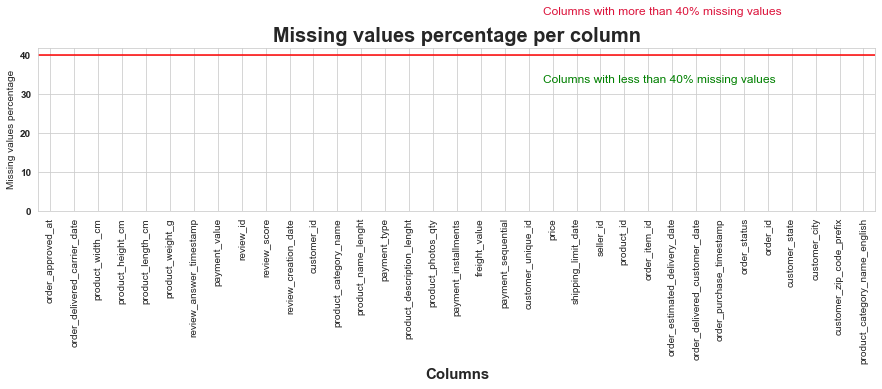

In [17]:
msv_1(dataSetFinal, 40, color=sns.color_palette('Reds', 15))

## Feature Engineering

### Création d'une variable "Delai_De_Livraison"

In [18]:
dt_livreur = dataSetFinal["order_purchase_timestamp"]
dt_livreur = dt_livreur.str.split(" ", expand=True)[0]
dt_livreur = dt_livreur.str.split("-", expand=True)
dt_livreur.rename(columns={0: 'Annee_Livreur'}, inplace=True)
dt_livreur.rename(columns={1: 'Mois_Livreur'}, inplace=True)
dt_livreur.rename(columns={2: 'Jour_Livreur'}, inplace=True)

dt_client = dataSetFinal["order_delivered_customer_date"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)
dt_client.rename(columns={0: 'Annee_Client'}, inplace=True)
dt_client.rename(columns={1: 'Mois_Client'}, inplace=True)
dt_client.rename(columns={2: 'Jour_Client'}, inplace=True)

dt = pd.concat([dt_livreur, dt_client], axis=1)

dt["Annee_Livreur"] = dt["Annee_Livreur"].astype(int)
dt["Mois_Livreur"] = dt["Mois_Livreur"].astype(int)
dt["Jour_Livreur"] = dt["Jour_Livreur"].astype(int)
dt["Annee_Client"] = dt["Annee_Client"].astype(int)
dt["Mois_Client"] = dt["Mois_Client"].astype(int)
dt["Jour_Client"] = dt["Jour_Client"].astype(int)

dt["Annee_Client - Annee_Livreur"] = dt["Annee_Client"] - dt["Annee_Livreur"]
dt["Mois_Client - Mois_Livreur"] = dt["Mois_Client"] - dt["Mois_Livreur"]
dt["Jour_Client - Jour_Livreur"] = dt["Jour_Client"] - dt["Jour_Livreur"]

dt["Delais_Livraison"] = 0

dt.head()

Annee_Livreur  Mois_Livreur  Jour_Livreur  Annee_Client  Mois_Client  \
0           2017             5            16          2017            5   
1           2017            11             9          2017           11   
2           2017            11             9          2017           11   
3           2017             5             7          2017            5   
4           2018             2             3          2018            2   

   Jour_Client  Annee_Client - Annee_Livreur  Mois_Client - Mois_Livreur  \
0           25                             0                           0   
1           28                             0                           0   
2           28                             0                           0   
3           26                             0                           0   
4           28                             0                           0   

   Jour_Client - Jour_Livreur  Delais_Livraison  
0                           9                 0  
1                          19                 0  
2                          19                 0  
3                          19                 0  
4                          25                 0

In [19]:
dt.loc[dt["Annee_Client - Annee_Livreur"] < 0, "Delais_Livraison"] = np.nan

In [20]:
tab1 = dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
              (dt["Mois_Client - Mois_Livreur"] == 0) &
              (dt["Jour_Client - Jour_Livreur"] >= 0), "Jour_Client"]

tab2 = dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
              (dt["Mois_Client - Mois_Livreur"] == 0) &
              (dt["Jour_Client - Jour_Livreur"] >= 0), "Jour_Livreur"]

dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
       (dt["Mois_Client - Mois_Livreur"] == 0) &
       (dt["Jour_Client - Jour_Livreur"] >= 0),
       "Delais_Livraison"] = tab1 - tab2

In [21]:
dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
       (dt["Mois_Client - Mois_Livreur"] == 0) &
       (dt["Jour_Client - Jour_Livreur"] < 0), "Delais_Livraison"] = np.nan

In [22]:
tab1_1 = dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
                (dt["Mois_Client - Mois_Livreur"] > 0), "Mois_Client"]

tab1_2 = dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
                (dt["Mois_Client - Mois_Livreur"] > 0), "Mois_Livreur"]

tab3 = dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
              (dt["Mois_Client - Mois_Livreur"] > 0), "Jour_Livreur"]

tab4 = dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
              (dt["Mois_Client - Mois_Livreur"] > 0), "Jour_Client"]

dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
       (dt["Mois_Client - Mois_Livreur"] > 0),
       "Delais_Livraison"] = (tab1_1 - tab1_2 - 1)*31 + (31 - tab3) + tab4

In [23]:
dt.loc[(dt["Annee_Client - Annee_Livreur"] == 0) &
       (dt["Mois_Client - Mois_Livreur"] < 0),
       "Delais_Livraison"] = np.nan

In [24]:
tab1_1 = dt.loc[dt["Annee_Client - Annee_Livreur"] > 0, "Annee_Client"]
tab1_2 = dt.loc[dt["Annee_Client - Annee_Livreur"] > 0, "Annee_Livreur"]
tab2_1 = dt.loc[dt["Annee_Client - Annee_Livreur"] > 0, "Mois_Client"]
tab2_2 = dt.loc[dt["Annee_Client - Annee_Livreur"] > 0, "Mois_Livreur"]
tab3_1 = dt.loc[dt["Annee_Client - Annee_Livreur"] > 0, "Jour_Client"]
tab3_2 = dt.loc[dt["Annee_Client - Annee_Livreur"] > 0, "Jour_Livreur"]

delais = (tab1_1 - tab1_2 - 1)*365
delais = delais + (tab2_1 - 1)*31
delais = delais + (12 - tab2_2)*31
delais = delais + (tab3_1) + (31 - tab3_2)

dt.loc[dt["Annee_Client - Annee_Livreur"] > 0, "Delais_Livraison"] = delais

In [25]:
dataSetFinal["Delais_Livraison"] = dt["Delais_Livraison"]
dataSetFinal.head(100)

customer_id                customer_unique_id  \
0   06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1   8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2   8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3   f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4   6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
5   fd3a0b1bd209f0e7d420c9c3d1127613  567ab47ca4deb92d46dbf54dce07d0a7   
6   fbd40c083aa8cddebb5265b2ba6aaf2e  f40ab89b622248b7ca125af4b486b887   
7   10558ef4afea173bfb5e2cbe3d5b0bb5  749943913a9851a39c9baf51877fbab6   
8   1c37c0f0cd1d88d46d9fc9494762abbd  432ecfa8b7b7ad2663c7abed0dc83c51   
9   20a452f528d487411fd7d3ebda1d0f20  31318a0597cd9d50ce4cfd03c80fe780   
10  20a452f528d487411fd7d3ebda1d0f20  31318a0597cd9d50ce4cfd03c80fe780   
11  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
12  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
13  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
14  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
15  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
16  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
17  d3286ca43aa21423c6045b2806ca8e56  acd02fc85cf6339f896c161af2b6abcd   
18  c49bec5f74f0413130abdaed8e7621d0  67d6f91d256bdf128fc960a166f413d5   
19  0058ebe2dc136d918dd001968cfa5903  9e8993ba2665307b71bd1641c2e1cb3d   
20  0058ebe2dc136d918dd001968cfa5903  9e8993ba2665307b71bd1641c2e1cb3d   
21  f91eb13e253823f25cf9a20fc2d08f56  1c91f8d50340522dd6601237ad13afff   
22  8bf4f9552bc2db14d6195bbbb5131941  b428f59c73c1bbeb3584744b4570654b   
23  70bc2fe12d0580eb8336285500defe0e  c71792e0cbb396e0a77258f474d971ab   
24  11eee0e62a0b905cf878ff13c8aec4a0  7dd466ce70871be5aba0ea1a43df6021   
25  11eee0e62a0b905cf878ff13c8aec4a0  7dd466ce70871be5aba0ea1a43df6021   
26  cf4dc8d4be7642c7c05a73188a3d8c1c  35c0fa6f2e6bbb3576e725d22e1066b8   
27  d24a0f00aa18133811d0aa666da75ff6  14803be716853016918954f7ef189abd   
28  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
29  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
30  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
31  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
32  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
33  9202f01b2ebd095e340abd57e02b65e6  7fcf7dc77013a88b9eef97c288b3eb8d   
34  ac318397fb90e64c9a724a3fc61ef587  aaad33c5051196b5e73c7d65b9072e1d   
35  ac318397fb90e64c9a724a3fc61ef587  aaad33c5051196b5e73c7d65b9072e1d   
36  15359860c7341b2f6b12259d83c2e697  52d8a619dff23c2985434b25e9862ff8   
37  454c1eeaac06aef9e44e33d80b12bdbc  fa516425f2667bd8a5a409f9112e663d   
38  f1c8bca25ab72158e4721761b51d7256  75fd60b26fd8ec7f00dff3a5dede2c77   
39  645d4fd3f4546d7c9592576665711186  661ada8f1f0f348790c6b9ce57d51f55   
40  b9c05cfc28f1dd72313d61b139faab45  46587168f28103639ae8249f19b53043   
41  97ee81fede5757f1ab031e83d1a59f56  452fab1c62b178922fc011b0eb89c1b9   
42  97ee81fede5757f1ab031e83d1a59f56  452fab1c62b178922fc011b0eb89c1b9   
43  44e25679aa4d5d2ef5103f6b0174a586  613259d64ba972e49dc25b019b7918c3   
44  90714b0e62fe1fbd304fb45fd644ebdd  c666e59a2d3ced923880461526113d38   
45  ab156e9202420e577b405360a7b29cbc  b52b8debdefe66d4c0d7f44d9b4ff088   
46  ab156e9202420e577b405360a7b29cbc  b52b8debdefe66d4c0d7f44d9b4ff088   
47  7f449435f005ccdf1808f0bc6e4ded34  1ad20cb261e24038bc33ebaca6ddad62   
48  a2a34d52a5ca3c214067d8d87f6ddf21  ca9522ba7a7c70fc06b2a82471681ce4   
49  a2a34d52a5ca3c214067d8d87f6ddf21  ca9522ba7a7c70fc06b2a82471681ce4   
50  95fd46b89a4174004b2407d01069a6d7  dff712b02bbaed94147ee35e29296897   
51  8039f8288f456b82f0c97e6063d003be  5f422502464dac44a0a981f29ec64043   
52  12dbbea9f6b7ebe93cc5dfcf0cfe55af  e8198977f57313464a8c3fd122c40050   
53  12dbbea9f6b7ebe93cc5dfcf0

### Variable "Prix_Produit_Freight"

In [26]:
tab1 = dataSetFinal["price"]
tab2 = dataSetFinal["freight_value"]

dataSetFinal["Prix_Produit_Freight"] = tab1 + tab2

In [27]:
dataSetFinal.head(100)

customer_id                customer_unique_id  \
0   06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1   8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
2   8912fc0c3bbf1e2fbf35819e21706718  9eae34bbd3a474ec5d07949ca7de67c0   
3   f0ac8e5a239118859b1734e1087cbb1f  3c799d181c34d51f6d44bbbc563024db   
4   6bc8d08963a135220ed6c6d098831f84  23397e992b09769faf5e66f9e171a241   
5   fd3a0b1bd209f0e7d420c9c3d1127613  567ab47ca4deb92d46dbf54dce07d0a7   
6   fbd40c083aa8cddebb5265b2ba6aaf2e  f40ab89b622248b7ca125af4b486b887   
7   10558ef4afea173bfb5e2cbe3d5b0bb5  749943913a9851a39c9baf51877fbab6   
8   1c37c0f0cd1d88d46d9fc9494762abbd  432ecfa8b7b7ad2663c7abed0dc83c51   
9   20a452f528d487411fd7d3ebda1d0f20  31318a0597cd9d50ce4cfd03c80fe780   
10  20a452f528d487411fd7d3ebda1d0f20  31318a0597cd9d50ce4cfd03c80fe780   
11  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
12  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
13  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
14  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
15  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
16  62f766c82849282806bf2f62ca86432e  83aca63b2193ea126b287f3ae61528d9   
17  d3286ca43aa21423c6045b2806ca8e56  acd02fc85cf6339f896c161af2b6abcd   
18  c49bec5f74f0413130abdaed8e7621d0  67d6f91d256bdf128fc960a166f413d5   
19  0058ebe2dc136d918dd001968cfa5903  9e8993ba2665307b71bd1641c2e1cb3d   
20  0058ebe2dc136d918dd001968cfa5903  9e8993ba2665307b71bd1641c2e1cb3d   
21  f91eb13e253823f25cf9a20fc2d08f56  1c91f8d50340522dd6601237ad13afff   
22  8bf4f9552bc2db14d6195bbbb5131941  b428f59c73c1bbeb3584744b4570654b   
23  70bc2fe12d0580eb8336285500defe0e  c71792e0cbb396e0a77258f474d971ab   
24  11eee0e62a0b905cf878ff13c8aec4a0  7dd466ce70871be5aba0ea1a43df6021   
25  11eee0e62a0b905cf878ff13c8aec4a0  7dd466ce70871be5aba0ea1a43df6021   
26  cf4dc8d4be7642c7c05a73188a3d8c1c  35c0fa6f2e6bbb3576e725d22e1066b8   
27  d24a0f00aa18133811d0aa666da75ff6  14803be716853016918954f7ef189abd   
28  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
29  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
30  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
31  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
32  d1ec48f722227f712bd7c376e194dcc2  5fff3ec8fc85df5fe57190fd9b6543ed   
33  9202f01b2ebd095e340abd57e02b65e6  7fcf7dc77013a88b9eef97c288b3eb8d   
34  ac318397fb90e64c9a724a3fc61ef587  aaad33c5051196b5e73c7d65b9072e1d   
35  ac318397fb90e64c9a724a3fc61ef587  aaad33c5051196b5e73c7d65b9072e1d   
36  15359860c7341b2f6b12259d83c2e697  52d8a619dff23c2985434b25e9862ff8   
37  454c1eeaac06aef9e44e33d80b12bdbc  fa516425f2667bd8a5a409f9112e663d   
38  f1c8bca25ab72158e4721761b51d7256  75fd60b26fd8ec7f00dff3a5dede2c77   
39  645d4fd3f4546d7c9592576665711186  661ada8f1f0f348790c6b9ce57d51f55   
40  b9c05cfc28f1dd72313d61b139faab45  46587168f28103639ae8249f19b53043   
41  97ee81fede5757f1ab031e83d1a59f56  452fab1c62b178922fc011b0eb89c1b9   
42  97ee81fede5757f1ab031e83d1a59f56  452fab1c62b178922fc011b0eb89c1b9   
43  44e25679aa4d5d2ef5103f6b0174a586  613259d64ba972e49dc25b019b7918c3   
44  90714b0e62fe1fbd304fb45fd644ebdd  c666e59a2d3ced923880461526113d38   
45  ab156e9202420e577b405360a7b29cbc  b52b8debdefe66d4c0d7f44d9b4ff088   
46  ab156e9202420e577b405360a7b29cbc  b52b8debdefe66d4c0d7f44d9b4ff088   
47  7f449435f005ccdf1808f0bc6e4ded34  1ad20cb261e24038bc33ebaca6ddad62   
48  a2a34d52a5ca3c214067d8d87f6ddf21  ca9522ba7a7c70fc06b2a82471681ce4   
49  a2a34d52a5ca3c214067d8d87f6ddf21  ca9522ba7a7c70fc06b2a82471681ce4   
50  95fd46b89a4174004b2407d01069a6d7  dff712b02bbaed94147ee35e29296897   
51  8039f8288f456b82f0c97e6063d003be  5f422502464dac44a0a981f29ec64043   
52  12dbbea9f6b7ebe93cc5dfcf0cfe55af  e8198977f57313464a8c3fd122c40050   
53  12dbbea9f6b7ebe93cc5dfcf0

## Agrégats Client: On construit les agrégats au niveau de chaque client sur l'ensemble de ses commandes

### Panier Moyen par client

In [28]:
cles = ["customer_unique_id",
        "order_id",
        "order_item_id",
        "product_id"]

cle5 = 'Prix_Produit_Freight'

Data = pd.DataFrame(dataSetFinal.groupby(cles, as_index=False).agg({cle5:'mean'}))
Data.head()

customer_unique_id                          order_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  3594e05a005ac4d06a72673270ef9ec9   
2  0000f46a3911fa3c0805444483337064  b33ec3b699337181488304f362a6b734   
3  0000f6ccb0745a6a4b88665a16c9f078  41272756ecddd9a9ed0180413cc22fb6   
4  0004aac84e0df4da2b147fca70cf8255  d957021f1127559cd947b62533f484f7   

   order_item_id                        product_id  Prix_Produit_Freight  
0              1  372645c7439f9661fbbacfd129aa92ec                141.90  
1              1  5099f7000472b634fea8304448d20825                 27.19  
2              1  64b488de448a5324c4134ea39c28a34b                 86.22  
3              1  2345a354a6f2033609bbf62bf5be9ef6                 43.62  
4              1  c72e18b3fe2739b8d24ebf3102450f37                196.89

In [29]:
num = "9a736b248f67d166d2fbb006bcb877c3"
dataSetFinal.loc[dataSetFinal["customer_unique_id"] == num]

customer_id                customer_unique_id  \
6097   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6098   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6099   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6100   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6101   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6102   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6103   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6104   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6105   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6106   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6107   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6108   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6109   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6110   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6111   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6112   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6113   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6114   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6115   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6116   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6117   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
36035  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36036  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36037  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36038  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36039  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36040  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36041  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36042  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36043  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36044  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36045  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36046  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
74291  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74292  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74293  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74294  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74295  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74296  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74297  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74298  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74299  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74300  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74301  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74302  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74303  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74304  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74305  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74306  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74307  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74308  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74309  270c23a11d024a44c

In [30]:
num = "9a736b248f67d166d2fbb006bcb877c3"
len(dataSetFinal.loc[dataSetFinal["customer_unique_id"] == num])

75

In [31]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data.loc[Data["customer_unique_id"] == num]

customer_unique_id                          order_id  \
65539  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
65540  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65541  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65542  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       order_item_id                        product_id  Prix_Produit_Freight  
65539              1  4eb99b5f0d7e411f246a5c9c0ae27a5e                 72.17  
65540              1  ebf9bc6cd600eadd681384e3116fda85                 36.20  
65541              2  ebf9bc6cd600eadd681384e3116fda85                 36.20  
65542              3  5ddab10d5e0a23acb99acf56b62b3276                 88.92

In [32]:
cles = ["customer_unique_id", "order_id"]
cle2 = "Prix_Produit_Freight"
Data = Data.groupby(cles, as_index=False).agg({cle2:'sum'})
Data.loc[Data["customer_unique_id"] == "9a736b248f67d166d2fbb006bcb877c3", :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       Prix_Produit_Freight  
57445                 72.17  
57446                161.32

In [33]:
cles = ["customer_unique_id"]
cle2 = "Prix_Produit_Freight"
num = "9a736b248f67d166d2fbb006bcb877c3"

Data = Data.groupby(cles, as_index=False).agg({cle2:'mean'})
Data.loc[Data["customer_unique_id"] == num, :]

customer_unique_id  Prix_Produit_Freight
55590  9a736b248f67d166d2fbb006bcb877c3               116.745

In [34]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
dataSetFinal.loc[dataSetFinal["customer_unique_id"] == num, :]

customer_id                customer_unique_id  \
13644  4740044a9390cc45b2c213e8714129e7  08f7cf00ed9ff3e0a08fc136ec272974   
13645  4740044a9390cc45b2c213e8714129e7  08f7cf00ed9ff3e0a08fc136ec272974   
38013  9dc44c77359aac6ad31f0937961a9940  08f7cf00ed9ff3e0a08fc136ec272974   
38014  9dc44c77359aac6ad31f0937961a9940  08f7cf00ed9ff3e0a08fc136ec272974   
38015  9dc44c77359aac6ad31f0937961a9940  08f7cf00ed9ff3e0a08fc136ec272974   
38016  9dc44c77359aac6ad31f0937961a9940  08f7cf00ed9ff3e0a08fc136ec272974   

       customer_zip_code_prefix customer_city customer_state  \
13644                     71900      brasilia             DF   
13645                     71900      brasilia             DF   
38013                     71900      brasilia             DF   
38014                     71900      brasilia             DF   
38015                     71900      brasilia             DF   
38016                     71900      brasilia             DF   

                               order_id order_status order_purchase_timestamp  \
13644  f9c78e6e58306dc81efbbada1ac11f24    delivered      2017-09-01 22:26:18   
13645  f9c78e6e58306dc81efbbada1ac11f24    delivered      2017-09-01 22:26:18   
38013  1f80ad89393a17282085bcd14644e45a    delivered      2017-09-01 22:26:18   
38014  1f80ad89393a17282085bcd14644e45a    delivered      2017-09-01 22:26:18   
38015  1f80ad89393a17282085bcd14644e45a    delivered      2017-09-01 22:26:18   
38016  1f80ad89393a17282085bcd14644e45a    delivered      2017-09-01 22:26:18   

         order_approved_at order_delivered_carrier_date  \
13644  2017-09-02 22:23:53          2017-09-05 12:08:46   
13645  2017-09-02 22:23:53          2017-09-05 12:08:46   
38013  2017-09-02 22:23:55          2017-09-06 19:43:53   
38014  2017-09-02 22:23:55          2017-09-06 19:43:53   
38015  2017-09-02 22:23:55          2017-09-06 19:43:53   
38016  2017-09-02 22:23:55          2017-09-06 19:43:53   

      order_delivered_customer_date order_estimated_delivery_date  \
13644           2017-09-13 19:07:33           2017-09-21 00:00:00   
13645           2017-09-13 19:07:33           2017-09-21 00:00:00   
38013           2017-09-18 18:11:46           2017-09-26 00:00:00   
38014           2017-09-18 18:11:46           2017-09-26 00:00:00   
38015           2017-09-18 18:11:46           2017-09-26 00:00:00   
38016           2017-09-18 18:11:46           2017-09-26 00:00:00   

       order_item_id                        product_id  \
13644              1  1d2d3b19f5c3d093d4dbccd3cd963a8f   
13645              1  1d2d3b19f5c3d093d4dbccd3cd963a8f   
38013              1  35b9cce4c9cd4359551a3d702b25ad4c   
38014              2  35b9cce4c9cd4359551a3d702b25ad4c   
38015              3  35b9cce4c9cd4359551a3d702b25ad4c   
38016              4  35b9cce4c9cd4359551a3d702b25ad4c   

                              seller_id  shipping_limit_date   price  \
13644  7ddcbb64b5bc1ef36ca8c151f6ec77df  2017-09-07 22:23:53  194.99   
13645  7ddcbb64b5bc1ef36ca8c151f6ec77df  2017-09-07 22:23:53  194.99   
38013  0adac9fbd9a2b63cccaac4f8756c1ca8  2017-09-07 22:23:55   19.90   
38014  0adac9fbd9a2b63cccaac4f8756c1ca8  2017-09-07 22:23:55   19.90   
38015  0adac9fbd9a2b63cccaac4f8756c1ca8  2017-09-07 22:23:55   19.90   
38016  0adac9fbd9a2b63cccaac4f8756c1ca8  2017-09-07 22:23:55   19.90   

       freight_value  payment_sequential payment_type  payment_installments  \
13644          20.85                   1  credit_card                     1   
13645          20.85                   1  credit_card                     1   
38013          15.10                   1  credit_card                     1   
38014          15.10                   1  credit_card                     1   
38015          15.10                   1  credit_card                     1   
38016          15.10                   1  credit_card                     1   

       payment_value                         review_id  review_score  \
13644         215.84  3c95105686e2a

In [35]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data.loc[Data["customer_unique_id"] == num, :]

customer_unique_id  Prix_Produit_Freight
3294  08f7cf00ed9ff3e0a08fc136ec272974                177.92

### Nombre d'articles moyen par client

In [36]:
cles = ["customer_unique_id",
        "order_id",
        "order_item_id",
        "product_id"]

cle5 = 'Prix_Produit_Freight'

Data2 = pd.DataFrame(dataSetFinal.groupby(cles, as_index=False).agg({cle5:'mean'}))
Data2.head(100)

customer_unique_id                          order_id  \
0   0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   
1   0000b849f77a49e4a4ce2b2a4ca5be3f  3594e05a005ac4d06a72673270ef9ec9   
2   0000f46a3911fa3c0805444483337064  b33ec3b699337181488304f362a6b734   
3   0000f6ccb0745a6a4b88665a16c9f078  41272756ecddd9a9ed0180413cc22fb6   
4   0004aac84e0df4da2b147fca70cf8255  d957021f1127559cd947b62533f484f7   
5   0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499   
6   00050ab1314c0e55a6ca13cf7181fecf  d0028facea13f508e880202d7097a5a1   
7   00053a61a98854899e70ed204dd4bafe  44e608f2db00c74a1fe329de44416a4e   
8   00053a61a98854899e70ed204dd4bafe  44e608f2db00c74a1fe329de44416a4e   
9   0005e1862207bf6ccc02e4228effd9a0  ae76bef74b97bcb0b3e355e60d9a6f9c   
10  0005ef4cd20d2893f0d9fbd94d3c0d97  01b330808c5819a6a3cb79b72f0b8288   
11  0006fdc98a402fceb4eb0ee528f6a8d4  6681163e3dab91c549952b2845b20281   
12  00082cbe03e478190aadbea78542e933  67503374d1fbcbe5e3a40324f703ffc8   
13  00090324bbad0e9342388303bb71ba0a  85bf8863657bff31006811d45d1c8db9   
14  000949456b182f53c18b68d6babc79c1  d342d7bad292d68d41d58ffb594cf431   
15  000a5ad9c4601d2bbdd9ed765d5213b3  f7fa5cf8386e51037856df1add3e1228   
16  000bfa1d2f1a41876493be685390d6d3  fd61441ba2a7b57e6342862e779b10b0   
17  000c8bdb58a29e7115cfc257230fb21b  34801c59d6ec5c5e89bfefb6ebef314d   
18  000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   
19  000de6019bb59f34c099a907c151d855  c6d61340bd8baeedca7cc8e7f7ec07e9   
20  000de6019bb59f34c099a907c151d855  c6d61340bd8baeedca7cc8e7f7ec07e9   
21  000e309254ab1fc5ba99dd469d36bdb4  c5d3fae065a8090bae39f4f34b14cd06   
22  000ec5bff359e1c0ad76a81a45cb598f  17e604bb550e265b46ebefe61430751b   
23  000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   
24  000fbf0473c10fc1ab6f8d2d286ce20c  87440e08790d85796f5b8bc9f5ed2707   
25  000fbf0473c10fc1ab6f8d2d286ce20c  87440e08790d85796f5b8bc9f5ed2707   
26  000fbf0473c10fc1ab6f8d2d286ce20c  87440e08790d85796f5b8bc9f5ed2707   
27  000fbf0473c10fc1ab6f8d2d286ce20c  87440e08790d85796f5b8bc9f5ed2707   
28  0010a452c6d13139e50b57f19f52e04e  57caee5837cc4a8f605f3a83bff208db   
29  0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   
30  001147e649a7b1afd577e873841632dd  533dbcda0a703be171113573af8b3467   
31  001147e649a7b1afd577e873841632dd  533dbcda0a703be171113573af8b3467   
32  00115fc7123b5310cf6d3a3aa932699e  91d1bf2b7745903cb0d17162d1bbd750   
33  0011805441c0d1b68b48002f1d005526  fb5d8b462dc9570527eff204b8a1a57b   
34  0011857aff0e5871ce5eb429f21cdaf5  58d34816de3da57e9e07d7b34aced1b8   
35  0011c98589159d6149979563c504cb21  3147d340c802cf04b463c4a5e532745d   
36  0012929d977a8d7280bb277c1e5f589d  569fce9b205731d6e0c9f31e9cabd8f5   
37  0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   
38  0015752e079902b12cd00b9b7596276b  c97e64988f3d2b091838bb2815fc246b   
39  0015752e079902b12cd00b9b7596276b  c97e64988f3d2b091838bb2815fc246b   
40  00172711b30d52eea8b313a7f2cced02  bb874c45df1a3c97842d52f31efee99a   
41  00191a9719ef48ebb5860b130347bf33  90a2ae3a8c450a4b8baba2fc8eb0fa59   
42  001926cef41060fae572e2e7b30bd2a4  6fc8cd5f4cfbea0b694434a10475fd6f   
43  001926cef41060fae572e2e7b30bd2a4  6fc8cd5f4cfbea0b694434a10475fd6f   
44  001928b561575b2821c92254a2327d06  aa14b8f4567fef1be1a8912ca010f1c7   
45  001928b561575b2821c92254a2327d06  aa14b8f4567fef1be1a8912ca010f1c7   
46  00196c4c9a3af7dd2ad10eade69c926f  1d88068495a8986f241f769664ac98de   
47  00196fdb2bf9edfc35e88ebfbcf8d781  3e83ca3523a68abaf07131a5ecab7319   
48  0019da6aa6bcb27cc32f1249bd12da05  792aa3f0da2e24c9df178369950f2d13   
49  0019e8c501c85848ac0966d45226fa1d  18bb4acb90913593d37049c601660009   
50  001a2bf0e46c684031af91fb2bce149d  b46c295d27c87441788cfd92b75b1a3d   
51  001a34eb30ecb8e3aacb07c475ca4dd1  279b9a9df2c05138cfda068bb1e0143d   
52  001a3a8e11d76c9a366c31a4aa2cc529  5a082b558a3798d3e36d93bfa8ca1eae   
53  001ae5a1788703d645

In [37]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data2.loc[Data2["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
65539  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
65540  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65541  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65542  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       order_item_id                        product_id  Prix_Produit_Freight  
65539              1  4eb99b5f0d7e411f246a5c9c0ae27a5e                 72.17  
65540              1  ebf9bc6cd600eadd681384e3116fda85                 36.20  
65541              2  ebf9bc6cd600eadd681384e3116fda85                 36.20  
65542              3  5ddab10d5e0a23acb99acf56b62b3276                 88.92

In [38]:
cles = ["customer_unique_id",
        "order_id"]

cle5 = 'order_item_id'

num = "9a736b248f67d166d2fbb006bcb877c3"

Data2 = Data2.groupby(cles, as_index=False).agg({cle5:'max'})
Data2.loc[Data2["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       order_item_id  
57445              1  
57446              3

In [39]:
cles = ["customer_unique_id"]
cles_2_1 = "order_item_id"
cles_2_2 = "Nb_Articles_Moyen"
cle5 = 'order_item_id'

num = "9a736b248f67d166d2fbb006bcb877c3"

Data2 = Data2.groupby(cles, as_index=False).agg({cle5:'mean'})
Data2.rename(columns={cles_2_1: cles_2_2}, inplace=True)
Data2.loc[Data2["customer_unique_id"] == num, :]

customer_unique_id  Nb_Articles_Moyen
55590  9a736b248f67d166d2fbb006bcb877c3                2.0

In [40]:
Data2.loc[Data2["customer_unique_id"] == "08f7cf00ed9ff3e0a08fc136ec272974", :]

customer_unique_id  Nb_Articles_Moyen
3294  08f7cf00ed9ff3e0a08fc136ec272974                2.5

### Review moyenne par client

In [41]:
cles = ["customer_unique_id",
        "order_id"]

cle5 = 'review_score'

Data_review = pd.DataFrame(dataSetFinal.groupby(cles, as_index=False).agg({cle5:'min'}))
Data_review.head()

customer_unique_id                          order_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  3594e05a005ac4d06a72673270ef9ec9   
2  0000f46a3911fa3c0805444483337064  b33ec3b699337181488304f362a6b734   
3  0000f6ccb0745a6a4b88665a16c9f078  41272756ecddd9a9ed0180413cc22fb6   
4  0004aac84e0df4da2b147fca70cf8255  d957021f1127559cd947b62533f484f7   

   review_score  
0             5  
1             4  
2             3  
3             4  
4             5

In [42]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"

Data_review.loc[Data_review["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
3391  08f7cf00ed9ff3e0a08fc136ec272974  1f80ad89393a17282085bcd14644e45a   
3392  08f7cf00ed9ff3e0a08fc136ec272974  f9c78e6e58306dc81efbbada1ac11f24   

      review_score  
3391             3  
3392             2

In [43]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
dataSetFinal.loc[dataSetFinal["customer_unique_id"] == num, :]

customer_id                customer_unique_id  \
13644  4740044a9390cc45b2c213e8714129e7  08f7cf00ed9ff3e0a08fc136ec272974   
13645  4740044a9390cc45b2c213e8714129e7  08f7cf00ed9ff3e0a08fc136ec272974   
38013  9dc44c77359aac6ad31f0937961a9940  08f7cf00ed9ff3e0a08fc136ec272974   
38014  9dc44c77359aac6ad31f0937961a9940  08f7cf00ed9ff3e0a08fc136ec272974   
38015  9dc44c77359aac6ad31f0937961a9940  08f7cf00ed9ff3e0a08fc136ec272974   
38016  9dc44c77359aac6ad31f0937961a9940  08f7cf00ed9ff3e0a08fc136ec272974   

       customer_zip_code_prefix customer_city customer_state  \
13644                     71900      brasilia             DF   
13645                     71900      brasilia             DF   
38013                     71900      brasilia             DF   
38014                     71900      brasilia             DF   
38015                     71900      brasilia             DF   
38016                     71900      brasilia             DF   

                               order_id order_status order_purchase_timestamp  \
13644  f9c78e6e58306dc81efbbada1ac11f24    delivered      2017-09-01 22:26:18   
13645  f9c78e6e58306dc81efbbada1ac11f24    delivered      2017-09-01 22:26:18   
38013  1f80ad89393a17282085bcd14644e45a    delivered      2017-09-01 22:26:18   
38014  1f80ad89393a17282085bcd14644e45a    delivered      2017-09-01 22:26:18   
38015  1f80ad89393a17282085bcd14644e45a    delivered      2017-09-01 22:26:18   
38016  1f80ad89393a17282085bcd14644e45a    delivered      2017-09-01 22:26:18   

         order_approved_at order_delivered_carrier_date  \
13644  2017-09-02 22:23:53          2017-09-05 12:08:46   
13645  2017-09-02 22:23:53          2017-09-05 12:08:46   
38013  2017-09-02 22:23:55          2017-09-06 19:43:53   
38014  2017-09-02 22:23:55          2017-09-06 19:43:53   
38015  2017-09-02 22:23:55          2017-09-06 19:43:53   
38016  2017-09-02 22:23:55          2017-09-06 19:43:53   

      order_delivered_customer_date order_estimated_delivery_date  \
13644           2017-09-13 19:07:33           2017-09-21 00:00:00   
13645           2017-09-13 19:07:33           2017-09-21 00:00:00   
38013           2017-09-18 18:11:46           2017-09-26 00:00:00   
38014           2017-09-18 18:11:46           2017-09-26 00:00:00   
38015           2017-09-18 18:11:46           2017-09-26 00:00:00   
38016           2017-09-18 18:11:46           2017-09-26 00:00:00   

       order_item_id                        product_id  \
13644              1  1d2d3b19f5c3d093d4dbccd3cd963a8f   
13645              1  1d2d3b19f5c3d093d4dbccd3cd963a8f   
38013              1  35b9cce4c9cd4359551a3d702b25ad4c   
38014              2  35b9cce4c9cd4359551a3d702b25ad4c   
38015              3  35b9cce4c9cd4359551a3d702b25ad4c   
38016              4  35b9cce4c9cd4359551a3d702b25ad4c   

                              seller_id  shipping_limit_date   price  \
13644  7ddcbb64b5bc1ef36ca8c151f6ec77df  2017-09-07 22:23:53  194.99   
13645  7ddcbb64b5bc1ef36ca8c151f6ec77df  2017-09-07 22:23:53  194.99   
38013  0adac9fbd9a2b63cccaac4f8756c1ca8  2017-09-07 22:23:55   19.90   
38014  0adac9fbd9a2b63cccaac4f8756c1ca8  2017-09-07 22:23:55   19.90   
38015  0adac9fbd9a2b63cccaac4f8756c1ca8  2017-09-07 22:23:55   19.90   
38016  0adac9fbd9a2b63cccaac4f8756c1ca8  2017-09-07 22:23:55   19.90   

       freight_value  payment_sequential payment_type  payment_installments  \
13644          20.85                   1  credit_card                     1   
13645          20.85                   1  credit_card                     1   
38013          15.10                   1  credit_card                     1   
38014          15.10                   1  credit_card                     1   
38015          15.10                   1  credit_card                     1   
38016          15.10                   1  credit_card                     1   

       payment_value                         review_id  review_score  \
13644         215.84  3c95105686e2a

In [44]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_review.loc[Data_review["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       review_score  
57445             5  
57446             5

In [45]:
num = "9a736b248f67d166d2fbb006bcb877c3"
dataSetFinal.loc[dataSetFinal["customer_unique_id"] == num, :]

customer_id                customer_unique_id  \
6097   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6098   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6099   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6100   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6101   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6102   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6103   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6104   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6105   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6106   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6107   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6108   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6109   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6110   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6111   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6112   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6113   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6114   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6115   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6116   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6117   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
36035  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36036  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36037  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36038  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36039  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36040  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36041  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36042  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36043  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36044  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36045  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36046  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
74291  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74292  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74293  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74294  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74295  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74296  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74297  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74298  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74299  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74300  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74301  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74302  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74303  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74304  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74305  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74306  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74307  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74308  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74309  270c23a11d024a44c

In [46]:
num = "35ecdf6858edc6427223b64804cf028e"
Data_review.loc[Data_review["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
20108  35ecdf6858edc6427223b64804cf028e  0095790a64527ec83aeaaf99023c050e   
20109  35ecdf6858edc6427223b64804cf028e  5a4ae77af140c48f0cd65b631bdcb342   
20110  35ecdf6858edc6427223b64804cf028e  a383762bd79949e1b34878460042cd23   
20111  35ecdf6858edc6427223b64804cf028e  abbfe78fd05873101e792fa04bbad963   
20112  35ecdf6858edc6427223b64804cf028e  bcb0343717a9e0265e156e34c25c3dc0   

       review_score  
20108             5  
20109             4  
20110             1  
20111             5  
20112             4

In [47]:
num = "35ecdf6858edc6427223b64804cf028e"
dataSetFinal.loc[dataSetFinal["customer_unique_id"] == num, :]

customer_id                customer_unique_id  \
10461   92af42b44706727c163d09e7b0d8a76c  35ecdf6858edc6427223b64804cf028e   
14806   40272bfc2f46fc530bb6eb75977b5a07  35ecdf6858edc6427223b64804cf028e   
14807   40272bfc2f46fc530bb6eb75977b5a07  35ecdf6858edc6427223b64804cf028e   
57414   3ef07c4bf193cdc766ec811397a59c88  35ecdf6858edc6427223b64804cf028e   
85699   6081c7acb40f63731b3c982857c79581  35ecdf6858edc6427223b64804cf028e   
95941   40272bfc2f46fc530bb6eb75977b5a07  35ecdf6858edc6427223b64804cf028e   
95942   40272bfc2f46fc530bb6eb75977b5a07  35ecdf6858edc6427223b64804cf028e   
103830  e6cf45b6775e86a43908d40341b3d53d  35ecdf6858edc6427223b64804cf028e   
103831  e6cf45b6775e86a43908d40341b3d53d  35ecdf6858edc6427223b64804cf028e   

        customer_zip_code_prefix customer_city customer_state  \
10461                      65075      sao luis             MA   
14806                      65075      sao luis             MA   
14807                      65075      sao luis             MA   
57414                      65075      sao luis             MA   
85699                      65075      sao luis             MA   
95941                      65075      sao luis             MA   
95942                      65075      sao luis             MA   
103830                     65075      sao luis             MA   
103831                     65075      sao luis             MA   

                                order_id order_status  \
10461   5a4ae77af140c48f0cd65b631bdcb342    delivered   
14806   bcb0343717a9e0265e156e34c25c3dc0    delivered   
14807   bcb0343717a9e0265e156e34c25c3dc0    delivered   
57414   abbfe78fd05873101e792fa04bbad963    delivered   
85699   0095790a64527ec83aeaaf99023c050e    delivered   
95941   bcb0343717a9e0265e156e34c25c3dc0    delivered   
95942   bcb0343717a9e0265e156e34c25c3dc0    delivered   
103830  a383762bd79949e1b34878460042cd23    delivered   
103831  a383762bd79949e1b34878460042cd23    delivered   

       order_purchase_timestamp    order_approved_at  \
10461       2017-08-05 14:55:19  2017-08-05 15:10:13   
14806       2017-08-05 14:55:19  2017-08-05 15:10:14   
14807       2017-08-05 14:55:19  2017-08-05 15:10:14   
57414       2017-10-03 01:25:30  2017-10-03 02:20:17   
85699       2017-11-15 13:36:30  2017-11-15 13:50:26   
95941       2017-08-05 14:55:19  2017-08-05 15:10:14   
95942       2017-08-05 14:55:19  2017-08-05 15:10:14   
103830      2018-03-31 21:18:49  2018-03-31 21:35:09   
103831      2018-03-31 21:18:49  2018-03-31 21:35:09   

       order_delivered_carrier_date order_delivered_customer_date  \
10461           2017-08-07 19:51:51           2017-08-24 19:36:46   
14806           2017-08-09 18:03:22           2017-08-11 17:57:50   
14807           2017-08-09 18:03:22           2017-08-11 17:57:50   
57414           2017-10-03 14:23:21           2017-10-14 11:58:37   
85699           2017-11-16 19:44:48           2017-12-07 21:46:56   
95941           2017-08-09 18:03:22           2017-08-11 17:57:50   
95942           2017-08-09 18:03:22           2017-08-11 17:57:50   
103830          2018-04-04 00:34:26           2018-04-21 01:38:20   
103831          2018-04-04 00:34:26           2018-04-21 01:38:20   

       order_estimated_delivery_date  order_item_id  \
10461            2017-09-12 00:00:00              1   
14806            2017-09-14 00:00:00              2   
14807            2017-09-14 00:00:00              2   
57414            2017-10-27 00:00:00              1   
85699            2017-12-11 00:00:00              1   
95941            2017-09-14 00:00:00              1   
95942            2017-09-14 00:00:00              1   
103830           2018-04-20 00:00:00              1   
103831           2018-04-20 00:00:00              2   

                              product_id                         seller_id  \
10461   11875b30b49585209e608f40e8082e65  669ae81880e08f269a64487cfb287169   
14806   06484143f7046fc1c2ec000aba13e28a  cb3dd9ce66268c7a3ca7241ac

In [48]:
cles = ["customer_unique_id"]
cle5 = 'review_score'

Data_review_2 = Data_review.groupby(cles, as_index=False).agg({cle5:'min'})

In [49]:
num = "35ecdf6858edc6427223b64804cf028e"
Data_review.loc[Data_review["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
20108  35ecdf6858edc6427223b64804cf028e  0095790a64527ec83aeaaf99023c050e   
20109  35ecdf6858edc6427223b64804cf028e  5a4ae77af140c48f0cd65b631bdcb342   
20110  35ecdf6858edc6427223b64804cf028e  a383762bd79949e1b34878460042cd23   
20111  35ecdf6858edc6427223b64804cf028e  abbfe78fd05873101e792fa04bbad963   
20112  35ecdf6858edc6427223b64804cf028e  bcb0343717a9e0265e156e34c25c3dc0   

       review_score  
20108             5  
20109             4  
20110             1  
20111             5  
20112             4

In [50]:
num = "35ecdf6858edc6427223b64804cf028e"
Data_review_2.loc[Data_review_2["customer_unique_id"] == num, :]

customer_unique_id  review_score
19483  35ecdf6858edc6427223b64804cf028e             1

### Délais de livraison Moyen par client

In [51]:
cles = ["customer_unique_id",
        "order_id"]

cle5 = 'Delais_Livraison'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Livraison = pd.DataFrame(tab)

In [52]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Livraison.loc[Data_Livraison["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       Delais_Livraison  
57445               5.0  
57446               6.0

In [53]:
num = "9a736b248f67d166d2fbb006bcb877c3"
dataSetFinal.loc[dataSetFinal["customer_unique_id"] == num, :]

customer_id                customer_unique_id  \
6097   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6098   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6099   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6100   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6101   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6102   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6103   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6104   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6105   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6106   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6107   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6108   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6109   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6110   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6111   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6112   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6113   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6114   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6115   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6116   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6117   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
36035  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36036  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36037  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36038  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36039  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36040  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36041  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36042  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36043  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36044  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36045  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36046  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
74291  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74292  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74293  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74294  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74295  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74296  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74297  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74298  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74299  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74300  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74301  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74302  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74303  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74304  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74305  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74306  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74307  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74308  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74309  270c23a11d024a44c

In [54]:
cles = ["customer_unique_id"]
cle5 = 'Delais_Livraison'

Data_Livraison_2 = Data_Livraison.groupby(cles, as_index=False).agg({cle5:'mean'})

In [57]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Livraison.loc[Data_Livraison["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       Delais_Livraison  
57445               5.0  
57446               6.0

In [58]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Livraison_2.loc[Data_Livraison_2["customer_unique_id"] == num, :]

customer_unique_id  Delais_Livraison
55590  9a736b248f67d166d2fbb006bcb877c3               5.5

In [59]:
Data_Client = pd.merge(Data, Data2, on=["customer_unique_id"])
Data_Client = pd.merge(Data_Client, Data_review_2, on=["customer_unique_id"])

tab_1 = Data_Client
tab_2 = Data_Livraison_2
Data_Client = pd.merge(tab_1, tab_2, on=["customer_unique_id"])

tab1_1 = 'review_score'
tab1_2 = 'Score Moyen'

tab2_1 = 'Delais_Livraison'
tab2_2 = 'Delais_Livraison_Moyen'

tab3_1 = 'Prix_Produit_Freight'
tab3_2 = 'Panier_Moyen'

dico = {tab1_1: tab1_2, tab2_1: tab2_2, tab3_1: tab3_2}
Data_Client.rename(columns=dico, inplace=True)

In [60]:
Data_Client.head()

customer_unique_id  Panier_Moyen  Nb_Articles_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2        141.90                1.0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         27.19                1.0   
2  0000f46a3911fa3c0805444483337064         86.22                1.0   
3  0000f6ccb0745a6a4b88665a16c9f078         43.62                1.0   
4  0004aac84e0df4da2b147fca70cf8255        196.89                1.0   

   Score Moyen  Delais_Livraison_Moyen  
0            5                     6.0  
1            4                     3.0  
2            3                    26.0  
3            4                    20.0  
4            5                    13.0

In [61]:
Data_Client.to_csv("Data_Client.csv")

In [62]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data.loc[Data["customer_unique_id"] == num, :]

customer_unique_id  Prix_Produit_Freight
3294  08f7cf00ed9ff3e0a08fc136ec272974                177.92

In [63]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data_Client.loc[Data_Client["customer_unique_id"] == num, :]

customer_unique_id  Panier_Moyen  Nb_Articles_Moyen  \
3294  08f7cf00ed9ff3e0a08fc136ec272974        177.92                2.5   

      Score Moyen  Delais_Livraison_Moyen  
3294            2                    14.5

### Nombre de Commandes par client

In [64]:
cles = ["customer_unique_id",
        "order_id"]

cle5 = 'order_item_id'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Nb_Commandes = pd.DataFrame(tab)

Data_Nb_Commandes["order_item_id"] = 1

dico = {'order_item_id': 'Nombre de Commandes'} 

Data_Nb_Commandes.rename(columns=dico, inplace=True)

Data_Nb_Commandes.head()

customer_unique_id                          order_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  3594e05a005ac4d06a72673270ef9ec9   
2  0000f46a3911fa3c0805444483337064  b33ec3b699337181488304f362a6b734   
3  0000f6ccb0745a6a4b88665a16c9f078  41272756ecddd9a9ed0180413cc22fb6   
4  0004aac84e0df4da2b147fca70cf8255  d957021f1127559cd947b62533f484f7   

   Nombre de Commandes  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1

In [65]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Nb_Commandes.loc[Data_Nb_Commandes["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       Nombre de Commandes  
57445                    1  
57446                    1

In [66]:
cles = ["customer_unique_id"]

cle5 = 'Nombre de Commandes'

tab = Data_Nb_Commandes.groupby(cles, as_index=False).agg({cle5:'sum'})

Data_Nb_Commandes = pd.DataFrame(tab)

In [67]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Nb_Commandes.loc[Data_Nb_Commandes["customer_unique_id"] == num, :]

customer_unique_id  Nombre de Commandes
55590  9a736b248f67d166d2fbb006bcb877c3                    2

In [68]:
tab1 = Data_Client
tab2 = Data_Nb_Commandes

Data_Client = pd.merge(tab1, tab2, on=["customer_unique_id"])

In [69]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Client.loc[Data_Client["customer_unique_id"] == num, :]

customer_unique_id  Panier_Moyen  Nb_Articles_Moyen  \
55590  9a736b248f67d166d2fbb006bcb877c3       116.745                2.0   

       Score Moyen  Delais_Livraison_Moyen  Nombre de Commandes  
55590            5                     5.5                    2

### Payment_Sequential Moyen par client

In [70]:
cles = ["customer_unique_id",
        "order_id"]

cle5 = 'payment_sequential'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_pay_seq = pd.DataFrame(tab)

In [71]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_pay_seq.loc[Data_pay_seq["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       payment_sequential  
57445                  12  
57446                  21

In [72]:
cles = ["customer_unique_id"]

cle5 = 'payment_sequential'

tab = Data_pay_seq.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_pay_seq = pd.DataFrame(tab)

In [73]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_pay_seq.loc[Data_pay_seq["customer_unique_id"] == num, :]

customer_unique_id  payment_sequential
55590  9a736b248f67d166d2fbb006bcb877c3                16.5

### Payment_Installments Moyen par client

In [74]:
cles = ["customer_unique_id",
        "order_id"]

cle5 = 'payment_installments'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_pay_inst = pd.DataFrame(tab)

In [75]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_pay_inst.loc[Data_pay_inst["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       payment_installments  
57445                     1  
57446                     1

In [76]:
cles = ["customer_unique_id"]

cle5 = 'payment_installments'

tab = Data_pay_inst.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_pay_inst = pd.DataFrame(tab)

In [77]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_pay_inst.loc[Data_pay_inst["customer_unique_id"] == num, :]

customer_unique_id  payment_installments
55590  9a736b248f67d166d2fbb006bcb877c3                   1.0

In [78]:
tab1 = Data_Client
tab2 = Data_pay_seq

Data_Client = pd.merge(tab1, tab2, on=["customer_unique_id"])

In [79]:
tab1 = Data_Client
tab2 = Data_pay_inst

Data_Client = pd.merge(tab1, tab2, on=["customer_unique_id"])

In [80]:
Data_Client.head()

customer_unique_id  Panier_Moyen  Nb_Articles_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2        141.90                1.0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         27.19                1.0   
2  0000f46a3911fa3c0805444483337064         86.22                1.0   
3  0000f6ccb0745a6a4b88665a16c9f078         43.62                1.0   
4  0004aac84e0df4da2b147fca70cf8255        196.89                1.0   

   Score Moyen  Delais_Livraison_Moyen  Nombre de Commandes  \
0            5                     6.0                    1   
1            4                     3.0                    1   
2            3                    26.0                    1   
3            4                    20.0                    1   
4            5                    13.0                    1   

   payment_sequential  payment_installments  
0                 1.0                   8.0  
1                 1.0                   1.0  
2                 1.0                   8.0  
3                 1.0                   4.0  
4                 1.0                   6.0

### Poids Moyen du produit par client

In [81]:
cles = ["customer_unique_id",
        "product_id"]

cle5 = 'product_weight_g'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Poids_Produit = pd.DataFrame(tab)

In [82]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Poids_Produit.loc[Data_Poids_Produit["customer_unique_id"] == num, :]

customer_unique_id                        product_id  \
59343  9a736b248f67d166d2fbb006bcb877c3  4eb99b5f0d7e411f246a5c9c0ae27a5e   
59344  9a736b248f67d166d2fbb006bcb877c3  5ddab10d5e0a23acb99acf56b62b3276   
59345  9a736b248f67d166d2fbb006bcb877c3  ebf9bc6cd600eadd681384e3116fda85   

       product_weight_g  
59343           15100.0  
59344             450.0  
59345            1300.0

In [83]:
cles = ["customer_unique_id"]

cle5 = 'product_weight_g'

tab = Data_Poids_Produit.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Poids_Produit = pd.DataFrame(tab)

In [84]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Poids_Produit.loc[Data_Poids_Produit["customer_unique_id"] == num, :]

customer_unique_id  product_weight_g
55590  9a736b248f67d166d2fbb006bcb877c3       5616.666667

### Taille Moyenne de la description du produit par client

In [85]:
cles = ["customer_unique_id",
        "product_id",
        "order_item_id"]

cle5 = 'product_description_lenght'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Description = pd.DataFrame(tab)

In [86]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data_Description.loc[Data_Description["customer_unique_id"] == num, :]

customer_unique_id                        product_id  \
3873  08f7cf00ed9ff3e0a08fc136ec272974  1d2d3b19f5c3d093d4dbccd3cd963a8f   
3874  08f7cf00ed9ff3e0a08fc136ec272974  35b9cce4c9cd4359551a3d702b25ad4c   
3875  08f7cf00ed9ff3e0a08fc136ec272974  35b9cce4c9cd4359551a3d702b25ad4c   
3876  08f7cf00ed9ff3e0a08fc136ec272974  35b9cce4c9cd4359551a3d702b25ad4c   
3877  08f7cf00ed9ff3e0a08fc136ec272974  35b9cce4c9cd4359551a3d702b25ad4c   

      order_item_id  product_description_lenght  
3873              1                       408.0  
3874              1                      1224.0  
3875              2                      1224.0  
3876              3                      1224.0  
3877              4                      1224.0

In [87]:
cles = ["customer_unique_id"]

cle5 = 'product_description_lenght'

tab = Data_Description.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Description = pd.DataFrame(tab)

In [88]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data_Description.loc[Data_Description["customer_unique_id"] == num, :]

customer_unique_id  product_description_lenght
3294  08f7cf00ed9ff3e0a08fc136ec272974                      1060.8

### Nombre Moyen de photos produit par client

In [89]:
cles = ["customer_unique_id",
        "product_id",
        "order_item_id"]

cle5 = 'product_photos_qty'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Photos = pd.DataFrame(tab)

In [90]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data_Photos.loc[Data_Photos["customer_unique_id"] == num, :]

customer_unique_id                        product_id  \
3873  08f7cf00ed9ff3e0a08fc136ec272974  1d2d3b19f5c3d093d4dbccd3cd963a8f   
3874  08f7cf00ed9ff3e0a08fc136ec272974  35b9cce4c9cd4359551a3d702b25ad4c   
3875  08f7cf00ed9ff3e0a08fc136ec272974  35b9cce4c9cd4359551a3d702b25ad4c   
3876  08f7cf00ed9ff3e0a08fc136ec272974  35b9cce4c9cd4359551a3d702b25ad4c   
3877  08f7cf00ed9ff3e0a08fc136ec272974  35b9cce4c9cd4359551a3d702b25ad4c   

      order_item_id  product_photos_qty  
3873              1                 1.0  
3874              1                 3.0  
3875              2                 3.0  
3876              3                 3.0  
3877              4                 3.0

In [91]:
cles = ["customer_unique_id"]

cle5 = 'product_photos_qty'

tab = Data_Photos.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Photos = pd.DataFrame(tab)

In [92]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data_Photos.loc[Data_Photos["customer_unique_id"] == num, :]

customer_unique_id  product_photos_qty
3294  08f7cf00ed9ff3e0a08fc136ec272974                 2.6

In [93]:
tab1 = Data_Poids_Produit
tab2 = Data_Description
tab3 = Data_Photos

Data_Client = pd.merge(Data_Client, tab1, on=["customer_unique_id"])
Data_Client = pd.merge(Data_Client, tab2, on=["customer_unique_id"])
Data_Client = pd.merge(Data_Client, tab3, on=["customer_unique_id"])

In [94]:
Data_Client.head()

customer_unique_id  Panier_Moyen  Nb_Articles_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2        141.90                1.0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         27.19                1.0   
2  0000f46a3911fa3c0805444483337064         86.22                1.0   
3  0000f6ccb0745a6a4b88665a16c9f078         43.62                1.0   
4  0004aac84e0df4da2b147fca70cf8255        196.89                1.0   

   Score Moyen  Delais_Livraison_Moyen  Nombre de Commandes  \
0            5                     6.0                    1   
1            4                     3.0                    1   
2            3                    26.0                    1   
3            4                    20.0                    1   
4            5                    13.0                    1   

   payment_sequential  payment_installments  product_weight_g  \
0                 1.0                   8.0            1500.0   
1                 1.0                   1.0             375.0   
2                 1.0                   8.0            1500.0   
3                 1.0                   4.0             150.0   
4                 1.0                   6.0            6050.0   

   product_description_lenght  product_photos_qty  
0                       236.0                 1.0  
1                       635.0                 1.0  
2                       177.0                 3.0  
3                      1741.0                 5.0  
4                       794.0                 3.0

### Type de Paiement par Client

In [95]:
cles = ["customer_unique_id",
        "order_id",
        "payment_sequential",
        "payment_value",
        "payment_type"]

cle5 = 'product_photos_qty'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Payment_Type = pd.DataFrame(tab)

s = pd.Series([i for i in range(len(Data_Payment_Type))])
Data_Payment_Type = Data_Payment_Type.set_index([s])

In [96]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
3528  08f7cf00ed9ff3e0a08fc136ec272974  1f80ad89393a17282085bcd14644e45a   
3529  08f7cf00ed9ff3e0a08fc136ec272974  f9c78e6e58306dc81efbbada1ac11f24   

      payment_sequential  payment_value payment_type  product_photos_qty  
3528                   1         140.00  credit_card                 3.0  
3529                   1         215.84  credit_card                 1.0

In [97]:
len(Data_Payment_Type)

99324

In [98]:
Data_Payment_Type.loc[Data_Payment_Type["payment_sequential"] > 9, :]

customer_unique_id                          order_id  \
881    024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
882    024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
883    024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
6164   0fc594155e889688ea4477afcd26a134  d2e18fcf7ecfd667af457a9e7034c86a   
6165   0fc594155e889688ea4477afcd26a134  d2e18fcf7ecfd667af457a9e7034c86a   
10837  1bc3d5e384c365c86cf79078f32eb495  3c58bffb70dcf45f12bdf66a3c215905   
10838  1bc3d5e384c365c86cf79078f32eb495  3c58bffb70dcf45f12bdf66a3c215905   
10839  1bc3d5e384c365c86cf79078f32eb495  3c58bffb70dcf45f12bdf66a3c215905   
10840  1bc3d5e384c365c86cf79078f32eb495  3c58bffb70dcf45f12bdf66a3c215905   
10841  1bc3d5e384c365c86cf79078f32eb495  3c58bffb70dcf45f12bdf66a3c215905   
11427  1d37df739a7cdbd28609dc2954cc2c75  1e6f350c900ca357945126e20117d293   
14360  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14361  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14362  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14363  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14364  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14365  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14366  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14367  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14368  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14369  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14468  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14469  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14470  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14471  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14472  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14473  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14474  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14475  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14476  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14477  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14478  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14479  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14480  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14704  25ba76039a1caff121dfcb0d66e54780  21577126c19bf11a0b91592e5844ba78   
14705  25ba76039a1caff121dfcb0d66e54780  21577126c19bf11a0b91592e5844ba78   
14706  25ba76039a1caff121dfcb0d66e54780  21577126c19bf11a0b91592e5844ba78   
14707  25ba76039a1caff121dfcb0d66e54780  21577126c19bf11a0b91592e5844ba78   
14708  25ba76039a1caff121dfcb0d66e54780  21577126c19bf11a0b91592e5844ba78   
14709  25ba76039a1caff121dfcb0d66e54780  21577126c19bf11a0b91592e5844ba78   
18494  2f8b722d3e62bb8a9860c7a29ad2b60f  b0f913cb83681e8a8563b96b641b3e1b   
18495  2f8b722d3e62bb8a9860c7a29ad2b60f  b0f913cb83681e8a8563b96b641b3e1b   
18724  301d1ce5a76b7e1bc47e5115bf5eb6ba  4689b1816de42507a7d63a4617383c59   
18725  301d1ce5a76b7e1bc47e5115bf5eb6ba  4689b1816de42507a7d63a4617383c59   
18726  301d1ce5a76b7e1bc47e5115bf5eb6ba  4689b1816de42507a7d63a4617383c59   
18727  301d1ce5a76b7e1bc47e5115bf5eb6ba  4689b1816de42507a7d63a4617383c59   
18728  301d1ce5a76b7e1bc47e5115bf5eb6ba  4689b1816de42507a7d63a4617383c59   
21804  3806104dbbc3d14c17b091b3b8e38d59  364f451ee38a4268d7c15d317021eb35   
22476  39c7f8c4e4552af113351a650816296c  1a611328643ae11146ba09a4425d2e12   
22477  39c7f8c4e4552af113351a650816296c  1a611328643ae11146ba09a4425d2e12   
22478  39c7f8c4e4552af113351a650816296c  1a611328643ae11146ba09a4425d2e12   
26007  43128f4462

In [99]:
num = "2524dcec233c3766f2c2b22f69fd65f4"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
14459  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14460  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14461  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14462  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14463  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14464  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14465  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14466  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14467  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14468  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14469  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14470  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14471  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14472  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14473  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14474  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14475  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14476  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14477  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14478  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14479  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   
14480  2524dcec233c3766f2c2b22f69fd65f4  285c2e15bebd4ac83635ccc563dc71f4   

       payment_sequential  payment_value payment_type  product_photos_qty  
14459                   1           1.62  credit_card                 1.0  
14460                   2           1.24      voucher                 1.0  
14461                   3           1.40      voucher                 1.0  
14462                   4           2.89      voucher                 1.0  
14463                   5           1.75      voucher                 1.0  
14464                   6           2.85      voucher                 1.0  
14465                   7           1.14      voucher                 1.0  
14466                   8           1.23      voucher                 1.0  
14467                   9           1.05      voucher                 1.0  
14468                  10           2.78      voucher                 1.0  
14469                  11           1.03      voucher                 1.0  
14470                  12           2.24      voucher                 1.0  
14471                  13           4.07      voucher                 1.0  
14472                  14           1.75      voucher                 1.0  
14473                  15           2.70      voucher                 1.0  
14474                  16           1.96      voucher                 1.0  
14475                  17           1.23      voucher                 1.0  
14476                  18           1.70      voucher                 1.0  
14477                  19           1.00      voucher                 1.0  
14478                  20           1.09      voucher                 1.0  
14479                  21           3.08      voucher                 1.0  
14480                  22           1.05      voucher                 1.0

In [100]:
num = "24f12460aad399ba18f4ed2c2fbab65d"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
14351  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14352  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14353  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14354  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14355  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14356  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14357  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14358  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14359  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14360  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14361  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14362  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14363  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14364  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14365  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14366  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14367  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14368  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   
14369  24f12460aad399ba18f4ed2c2fbab65d  ee9ca989fc93ba09a6eddc250ce01742   

       payment_sequential  payment_value payment_type  product_photos_qty  
14351                   1           1.76  credit_card                 1.0  
14352                   2           5.88      voucher                 1.0  
14353                   3          12.49      voucher                 1.0  
14354                   4           3.49      voucher                 1.0  
14355                   5           3.58      voucher                 1.0  
14356                   6           3.75      voucher                 1.0  
14357                   7           1.92      voucher                 1.0  
14358                   8           5.31      voucher                 1.0  
14359                   9           3.90      voucher                 1.0  
14360                  10           2.45      voucher                 1.0  
14361                  11           1.68      voucher                 1.0  
14362                  12           2.80      voucher                 1.0  
14363                  13           6.51      voucher                 1.0  
14364                  14           4.70      voucher                 1.0  
14365                  15           1.92      voucher                 1.0  
14366                  16           6.51      voucher                 1.0  
14367                  17           7.19      voucher                 1.0  
14368                  18           2.33      voucher                 1.0  
14369                  19           4.56      voucher                 1.0

In [101]:
num = "569aa12b73b5f7edeaa6f2a01603e381"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
33587  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33588  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33589  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33590  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33591  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33592  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33593  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33594  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33595  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33596  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33597  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33598  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33599  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33600  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33601  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33602  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33603  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33604  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33605  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33606  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33607  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33608  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33609  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33610  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33611  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   
33612  569aa12b73b5f7edeaa6f2a01603e381  ccf804e764ed5650cd8759557269dc13   

       payment_sequential  payment_value payment_type  product_photos_qty  
33587                   1           2.20  credit_card                 1.0  
33588                   2           1.45      voucher                 1.0  
33589                   3           1.15      voucher                 1.0  
33590                   4           0.99      voucher                 1.0  
33591                   5           2.69      voucher                 1.0  
33592                   6           2.26      voucher                 1.0  
33593                   7           1.60      voucher                 1.0  
33594                   8           2.42      voucher                 1.0  
33595                   9           0.97      voucher                 1.0  
33596                  10           1.20      voucher                 1.0  
33597                  11           2.97      voucher                 1.0  
33598                  12           2.45      voucher                 1.0  
33599                  13           1.04      voucher                 1.0  
33600                  14           0.97      voucher                 1.0  
33601                  15           1.11      voucher                 1.0  
33602                  16           1.07      voucher                 1.0  
33603                  17           1.11      voucher                 1.0  
33604                  18           1.40      voucher                 1.0  
33605                  19           1.68      voucher                 1.0  
33606                  20           0.99      voucher                 1.0  
33607                  21           1.45      voucher                 1.0  
33608                  22           1.06      voucher                 1.0  
33609                  23           1.03      voucher                 1.0  
33610                  24           2.79      voucher                 1.0  
33611                  25           1.53 

In [102]:
num = "024676cef113f6c81db6c5b8d29e5ee9"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
872  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
873  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
874  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
875  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
876  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
877  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
878  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
879  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
880  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
881  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
882  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
883  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   

     payment_sequential  payment_value payment_type  product_photos_qty  
872                   1           0.48  credit_card                 4.0  
873                   2          14.41      voucher                 4.0  
874                   3           3.17      voucher                 4.0  
875                   4           5.16      voucher                 4.0  
876                   5           3.25      voucher                 4.0  
877                   6           8.47      voucher                 4.0  
878                   7           4.44      voucher                 4.0  
879                   8           6.74      voucher                 4.0  
880                   9           4.73      voucher                 4.0  
881                  10           3.00      voucher                 4.0  
882                  11           3.17      voucher                 4.0  
883                  12           6.56      voucher                 4.0

In [103]:
tab = pd.get_dummies(Data_Payment_Type["payment_type"])
s = pd.Series([i for i in range(len(tab))])
tab = tab.set_index([s])

tab.head(100)

boleto  credit_card  debit_card  voucher
0        0            1           0        0
1        0            1           0        0
2        0            1           0        0
3        0            1           0        0
4        0            1           0        0
5        0            1           0        0
6        1            0           0        0
7        0            1           0        0
8        0            1           0        0
9        0            1           0        0
10       0            1           0        0
11       1            0           0        0
12       0            1           0        0
13       1            0           0        0
14       0            1           0        0
15       0            1           0        0
16       0            1           0        0
17       0            1           0        0
18       0            1           0        0
19       0            1           0        0
20       0            0           0        1
21       1            0           0        0
22       0            1           0        0
23       1            0           0        0
24       0            1           0        0
25       0            1           0        0
26       0            1           0        0
27       0            1           0        0
28       0            1           0        0
29       0            1           0        0
30       0            1           0        0
31       1            0           0        0
32       0            1           0        0
33       0            1           0        0
34       0            1           0        0
35       0            1           0        0
36       0            1           0        0
37       0            1           0        0
38       1            0           0        0
39       0            1           0        0
40       0            1           0        0
41       0            1           0        0
42       0            1           0        0
43       0            1           0        0
44       0            1           0        0
45       1            0           0        0
46       0            1           0        0
47       0            1           0        0
48       0            1           0        0
49       0            1           0        0
50       0            1           0        0
51       0            1           0        0
52       0            1           0        0
53       0            1           0        0
54       0            1           0        0
55       0            1           0        0
56       0            0           0        1
57       1            0           0        0
58       1            0           0        0
59       0            1           0        0
60       0            1           0        0
61       0            1           0        0
62       0            1           0        0
63       0            1           0        0
64       1            0           0        0
65       1            0           0        0
66       0            1           0        0
67       0            1           0        0
68       0            1           0        0
69       0            1           0        0
70       0            1           0        0
71       0            1           0        0
72       0            1           0        0
73       0            1           0        0
74       0            0           0        1
75       0            1           0        0
76       0            1           0        0
77       1            0           0        0
78       0            1           0        0
79       0            1           0        0
80       0            1           0        0
81       0            1           0        0
82       1            0           0        0
83       0            1           0        0
84       1            0           0        0
85       0            1           0        0
86       0            1           0        0
87       0            1           0        0

In [104]:
len(tab)

99324

In [105]:
Data_Payment_Type = pd.concat([Data_Payment_Type,tab], axis=1)
Data_Payment_Type.head(100)

customer_unique_id                          order_id  \
0   0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   
1   0000b849f77a49e4a4ce2b2a4ca5be3f  3594e05a005ac4d06a72673270ef9ec9   
2   0000f46a3911fa3c0805444483337064  b33ec3b699337181488304f362a6b734   
3   0000f6ccb0745a6a4b88665a16c9f078  41272756ecddd9a9ed0180413cc22fb6   
4   0004aac84e0df4da2b147fca70cf8255  d957021f1127559cd947b62533f484f7   
5   0004bd2a26a76fe21f786e4fbd80607f  3e470077b690ea3e3d501cffb5e0c499   
6   00050ab1314c0e55a6ca13cf7181fecf  d0028facea13f508e880202d7097a5a1   
7   00053a61a98854899e70ed204dd4bafe  44e608f2db00c74a1fe329de44416a4e   
8   0005e1862207bf6ccc02e4228effd9a0  ae76bef74b97bcb0b3e355e60d9a6f9c   
9   0005ef4cd20d2893f0d9fbd94d3c0d97  01b330808c5819a6a3cb79b72f0b8288   
10  0006fdc98a402fceb4eb0ee528f6a8d4  6681163e3dab91c549952b2845b20281   
11  00082cbe03e478190aadbea78542e933  67503374d1fbcbe5e3a40324f703ffc8   
12  00090324bbad0e9342388303bb71ba0a  85bf8863657bff31006811d45d1c8db9   
13  000949456b182f53c18b68d6babc79c1  d342d7bad292d68d41d58ffb594cf431   
14  000a5ad9c4601d2bbdd9ed765d5213b3  f7fa5cf8386e51037856df1add3e1228   
15  000bfa1d2f1a41876493be685390d6d3  fd61441ba2a7b57e6342862e779b10b0   
16  000c8bdb58a29e7115cfc257230fb21b  34801c59d6ec5c5e89bfefb6ebef314d   
17  000d460961d6dbfa3ec6c9f5805769e1  5fd641e5e16c3b056b1fb4dd6e429c43   
18  000de6019bb59f34c099a907c151d855  c6d61340bd8baeedca7cc8e7f7ec07e9   
19  000e309254ab1fc5ba99dd469d36bdb4  c5d3fae065a8090bae39f4f34b14cd06   
20  000e309254ab1fc5ba99dd469d36bdb4  c5d3fae065a8090bae39f4f34b14cd06   
21  000ec5bff359e1c0ad76a81a45cb598f  17e604bb550e265b46ebefe61430751b   
22  000ed48ceeb6f4bf8ad021a10a3c7b43  4b2626de72497770ddfa81a533f70c76   
23  000fbf0473c10fc1ab6f8d2d286ce20c  87440e08790d85796f5b8bc9f5ed2707   
24  0010a452c6d13139e50b57f19f52e04e  57caee5837cc4a8f605f3a83bff208db   
25  0010fb34b966d44409382af9e8fd5b77  1fc81b1074b61a259529663946b10a32   
26  001147e649a7b1afd577e873841632dd  533dbcda0a703be171113573af8b3467   
27  00115fc7123b5310cf6d3a3aa932699e  91d1bf2b7745903cb0d17162d1bbd750   
28  0011805441c0d1b68b48002f1d005526  fb5d8b462dc9570527eff204b8a1a57b   
29  0011857aff0e5871ce5eb429f21cdaf5  58d34816de3da57e9e07d7b34aced1b8   
30  0011c98589159d6149979563c504cb21  3147d340c802cf04b463c4a5e532745d   
31  0012929d977a8d7280bb277c1e5f589d  569fce9b205731d6e0c9f31e9cabd8f5   
32  0014a5a58da615f7b01a4f5e194bf5ea  3eb5983ab1e64ba4a4dd7425a6d6d48b   
33  0015752e079902b12cd00b9b7596276b  c97e64988f3d2b091838bb2815fc246b   
34  00172711b30d52eea8b313a7f2cced02  bb874c45df1a3c97842d52f31efee99a   
35  00191a9719ef48ebb5860b130347bf33  90a2ae3a8c450a4b8baba2fc8eb0fa59   
36  001926cef41060fae572e2e7b30bd2a4  6fc8cd5f4cfbea0b694434a10475fd6f   
37  001928b561575b2821c92254a2327d06  aa14b8f4567fef1be1a8912ca010f1c7   
38  00196c4c9a3af7dd2ad10eade69c926f  1d88068495a8986f241f769664ac98de   
39  00196fdb2bf9edfc35e88ebfbcf8d781  3e83ca3523a68abaf07131a5ecab7319   
40  0019da6aa6bcb27cc32f1249bd12da05  792aa3f0da2e24c9df178369950f2d13   
41  0019e8c501c85848ac0966d45226fa1d  18bb4acb90913593d37049c601660009   
42  001a2bf0e46c684031af91fb2bce149d  b46c295d27c87441788cfd92b75b1a3d   
43  001a34eb30ecb8e3aacb07c475ca4dd1  279b9a9df2c05138cfda068bb1e0143d   
44  001a3a8e11d76c9a366c31a4aa2cc529  5a082b558a3798d3e36d93bfa8ca1eae   
45  001ae5a1788703d64536c30362503e49  0247aa98317f60908e99f44e7a2a4896   
46  001deb796b28a3a128d6113857569aa4  bc444369eaecdac2463e2551eff32463   
47  001f3c4211216384d5fe59b041ce1461  7845d9a1a3d511b756a5c2c2352ba770   
48  002043098f10ba39a4600b6c52fbfe3c  4c5fb984844ad48dc34f8acf42eb0eda   
49  002311514717ca8b65b09a26cdf7b91a  9256fda5584ec43f6212f63bdf17b2ec   
50  0023557a94bef0038066b5d1b3dc763e  e91130c6fc7b9ad7646ba8260477bd66   
51  002471155ecd08d208d1376720e2a907  f9e6499752da6fc8ae3b440055370d8f   
52  00256bf7b05c08f6a5849df3d0a64f1f  9486c11941b06fdf44a70c74c0d03ed3   
53  0025795df7a7d077c4

In [106]:
len(Data_Payment_Type)

99324

In [107]:
Data_Payment_Type.head()

customer_unique_id                          order_id  \
0  0000366f3b9a7992bf8c76cfdf3221e2  e22acc9c116caa3f2b7121bbb380d08e   
1  0000b849f77a49e4a4ce2b2a4ca5be3f  3594e05a005ac4d06a72673270ef9ec9   
2  0000f46a3911fa3c0805444483337064  b33ec3b699337181488304f362a6b734   
3  0000f6ccb0745a6a4b88665a16c9f078  41272756ecddd9a9ed0180413cc22fb6   
4  0004aac84e0df4da2b147fca70cf8255  d957021f1127559cd947b62533f484f7   

   payment_sequential  payment_value payment_type  product_photos_qty  boleto  \
0                   1         141.90  credit_card                 1.0       0   
1                   1          27.19  credit_card                 1.0       0   
2                   1          86.22  credit_card                 3.0       0   
3                   1          43.62  credit_card                 5.0       0   
4                   1         196.89  credit_card                 3.0       0   

   credit_card  debit_card  voucher  
0            1           0        0  
1            1           0        0  
2            1           0        0  
3            1           0        0  
4            1           0        0

In [108]:
len(Data_Payment_Type)

99324

In [109]:
num = "024676cef113f6c81db6c5b8d29e5ee9"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
872  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
873  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
874  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
875  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
876  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
877  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
878  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
879  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
880  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
881  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
882  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   
883  024676cef113f6c81db6c5b8d29e5ee9  1d9a9731b9c10fc9cba74e6f74782e8b   

     payment_sequential  payment_value payment_type  product_photos_qty  \
872                   1           0.48  credit_card                 4.0   
873                   2          14.41      voucher                 4.0   
874                   3           3.17      voucher                 4.0   
875                   4           5.16      voucher                 4.0   
876                   5           3.25      voucher                 4.0   
877                   6           8.47      voucher                 4.0   
878                   7           4.44      voucher                 4.0   
879                   8           6.74      voucher                 4.0   
880                   9           4.73      voucher                 4.0   
881                  10           3.00      voucher                 4.0   
882                  11           3.17      voucher                 4.0   
883                  12           6.56      voucher                 4.0   

     boleto  credit_card  debit_card  voucher  
872       0            1           0        0  
873       0            0           0        1  
874       0            0           0        1  
875       0            0           0        1  
876       0            0           0        1  
877       0            0           0        1  
878       0            0           0        1  
879       0            0           0        1  
880       0            0           0        1  
881       0            0           0        1  
882       0            0           0        1  
883       0            0           0        1

In [110]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
60000  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60001  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60002  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60003  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60004  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60005  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60006  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60007  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60008  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60009  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60010  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60011  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60012  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60013  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60014  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60015  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60016  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60017  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60018  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60019  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60020  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60021  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60022  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60023  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60024  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60025  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60026  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60027  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60028  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60029  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60030  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60031  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60032  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       payment_sequential  payment_value payment_type  product_photos_qty  \
60000                   1           8.03      voucher                 1.0   
60001                   2           8.00      voucher                 1.0   
60002                   3           8.00      voucher                 1.0   
60003                   4           8.00      voucher                 1.0   
60004                   5           8.00      voucher                 1.0   
60005                   6           8.00      voucher                 1.0   
60006                   7           1.27      voucher                 1.0   
60007                   8           8.00      voucher                 1.0   
60008                   9           8.00      voucher                 1.0   
60009                  10           0.74      voucher                 1.0   
60010                  11           4.00      voucher                 1.0   
60011                  12           2.13      voucher                 1.0   
60012                   1           2.61      voucher                 8.0   
60013                   2           2.61      voucher                 8.0   
60014                   3           2.61      voucher                 8.0   
60015                   4           2.61      voucher                 8.0   
60016                   5           2.61      voucher                 8.0   
60017           

In [111]:
num = "9a736b248f67d166d2fbb006bcb877c3"
len(Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :])

33

In [112]:
cles = ["customer_unique_id"]

cle5_1 = 'boleto'
cle5_2 = 'credit_card'
cle5_3 = 'debit_card'
cle5_4 = 'voucher'

dico = {cle5_1:'sum',
        cle5_2:'sum',
        cle5_3:'sum',
        cle5_4:'sum'}

tab = Data_Payment_Type.groupby(cles, as_index=False).agg(dico)

Data_Payment_Type = pd.DataFrame(tab)

num = "024676cef113f6c81db6c5b8d29e5ee9"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id  boleto  credit_card  debit_card  \
819  024676cef113f6c81db6c5b8d29e5ee9       0            1           0   

     voucher  
819       11

In [113]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id  boleto  credit_card  debit_card  \
55590  9a736b248f67d166d2fbb006bcb877c3       0            0           0   

       voucher  
55590       33

In [114]:
num = "569aa12b73b5f7edeaa6f2a01603e381"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id  boleto  credit_card  debit_card  \
31232  569aa12b73b5f7edeaa6f2a01603e381       0            1           0   

       voucher  
31232       25

In [115]:
num = "2524dcec233c3766f2c2b22f69fd65f4"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id  boleto  credit_card  debit_card  \
13428  2524dcec233c3766f2c2b22f69fd65f4       0            1           0   

       voucher  
13428       21

In [116]:
tab1 = Data_Payment_Type

Data_Client = pd.merge(Data_Client, tab1, on=["customer_unique_id"])

In [117]:
Data_Client["product_weight_g"].unique()

array([1500. ,  375. ,  150. , ..., 9875. , 3441.5, 1673. ])

In [118]:
len(Data_Client)

92076

In [119]:
Data_Client = Data_Client.dropna()

In [120]:
len(Data_Client)

92075

In [121]:
Data_Client.to_csv("Data_Client.csv")

## Analyse Exploratoire

In [122]:
Data_Client = pd.read_csv('Data_Client.csv')

In [123]:
Data_Client.head()

Unnamed: 0                customer_unique_id  Panier_Moyen  \
0           0  0000366f3b9a7992bf8c76cfdf3221e2        141.90   
1           1  0000b849f77a49e4a4ce2b2a4ca5be3f         27.19   
2           2  0000f46a3911fa3c0805444483337064         86.22   
3           3  0000f6ccb0745a6a4b88665a16c9f078         43.62   
4           4  0004aac84e0df4da2b147fca70cf8255        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  \
0                1.0            5                     6.0   
1                1.0            4                     3.0   
2                1.0            3                    26.0   
3                1.0            4                    20.0   
4                1.0            5                    13.0   

   Nombre de Commandes  payment_sequential  payment_installments  \
0                    1                 1.0                   8.0   
1                    1                 1.0                   1.0   
2                    1                 1.0                   8.0   
3                    1                 1.0                   4.0   
4                    1                 1.0                   6.0   

   product_weight_g  product_description_lenght  product_photos_qty  boleto  \
0            1500.0                       236.0                 1.0       0   
1             375.0                       635.0                 1.0       0   
2            1500.0                       177.0                 3.0       0   
3             150.0                      1741.0                 5.0       0   
4            6050.0                       794.0                 3.0       0   

   credit_card  debit_card  voucher  
0            1           0        0  
1            1           0        0  
2            1           0        0  
3            1           0        0  
4            1           0        0

In [124]:
Data_Client["Panier_Moyen"].unique()

array([ 141.9 ,   27.19,   86.22, ..., 2844.96,  265.8 , 2067.42])

In [125]:
max(Data_Client["Panier_Moyen"].unique())

13664.08

In [126]:
len(Data_Client["Nb_Articles_Moyen"].unique())

40

<AxesSubplot:xlabel='Panier_Moyen', ylabel='Count'>

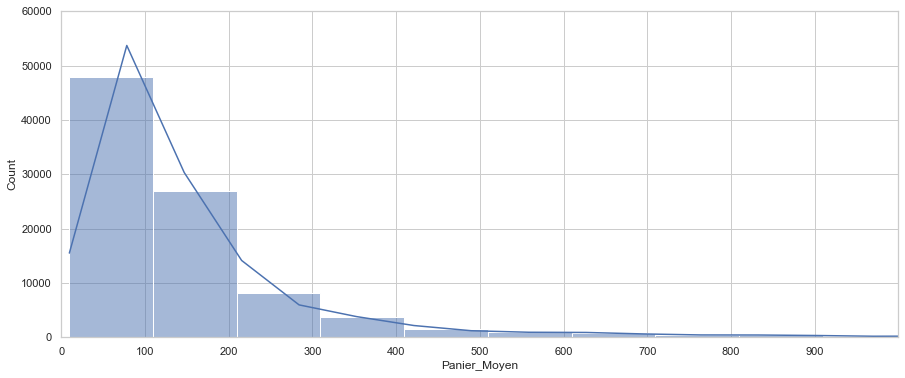

In [127]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=[15, 6])
axes = plt.gca()
axes.xaxis.set_ticks(range(0, 1000, 100))
plt.axis([0, 1000, 0, 60000])
sns.histplot(data=Data_Client,
             x="Panier_Moyen",
             kde=True,
             binwidth=100)

In [255]:
np.mean(Data_Client["Panier_Moyen"].unique())

261.9746765152293

In [254]:
max(Data_Client["Panier_Moyen"].unique())

13664.08

<AxesSubplot:xlabel='Nb_Articles_Moyen', ylabel='Count'>

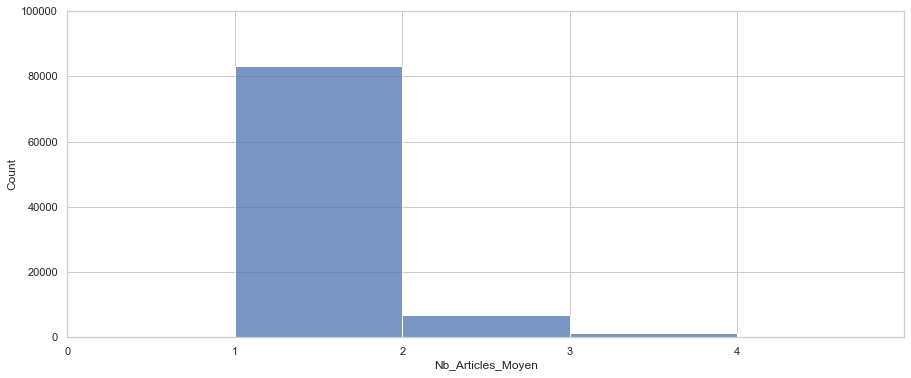

In [129]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=[15, 6])
axes = plt.gca()
axes.xaxis.set_ticks(range(0, 5, 1))
plt.axis([0, 5, 0, 100000])
sns.histplot(data=Data_Client,
             x="Nb_Articles_Moyen",
             kde=False,
             binwidth=1)

In [130]:
len(Data_Client["Nb_Articles_Moyen"].unique())

40

In [131]:
Data_Client.loc[(Data_Client["Nb_Articles_Moyen"] >= 1) &
                (Data_Client["Nb_Articles_Moyen"] < 2),
                "Nb_Articles_Moyen"] = 1
Data_Client.loc[(Data_Client["Nb_Articles_Moyen"] >= 2) &
                (Data_Client["Nb_Articles_Moyen"] < 3),
                "Nb_Articles_Moyen"] = 2
Data_Client.loc[Data_Client["Nb_Articles_Moyen"] >= 3, "Nb_Articles_Moyen"] = 3

In [132]:
d = {"Nb_Articles_Moyen": Data_Client["Nb_Articles_Moyen"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)
df = df.groupby("Nb_Articles_Moyen")["Compte"].sum()

d2 = {"Nb_Articles_Moyen_2": ["1", "2", "3"],
      "Compte": df}
df2 = pd.DataFrame(data=d2)

df2 = df2.sort_values(by="Nb_Articles_Moyen_2",
                      ascending=True)

df2

Nb_Articles_Moyen_2  Compte
Nb_Articles_Moyen                            
1.0                                 1   83139
2.0                                 2    6908
3.0                                 3    2028

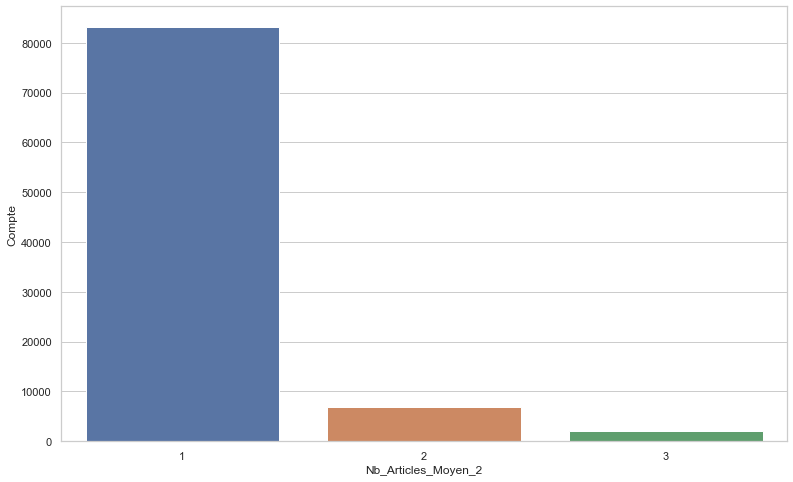

In [133]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=[13, 8])
ax = sns.barplot(x="Nb_Articles_Moyen_2",
                 y="Compte",
                 data=df2)

Text(0.5, 1.0, "Nombre d'articles moyen")

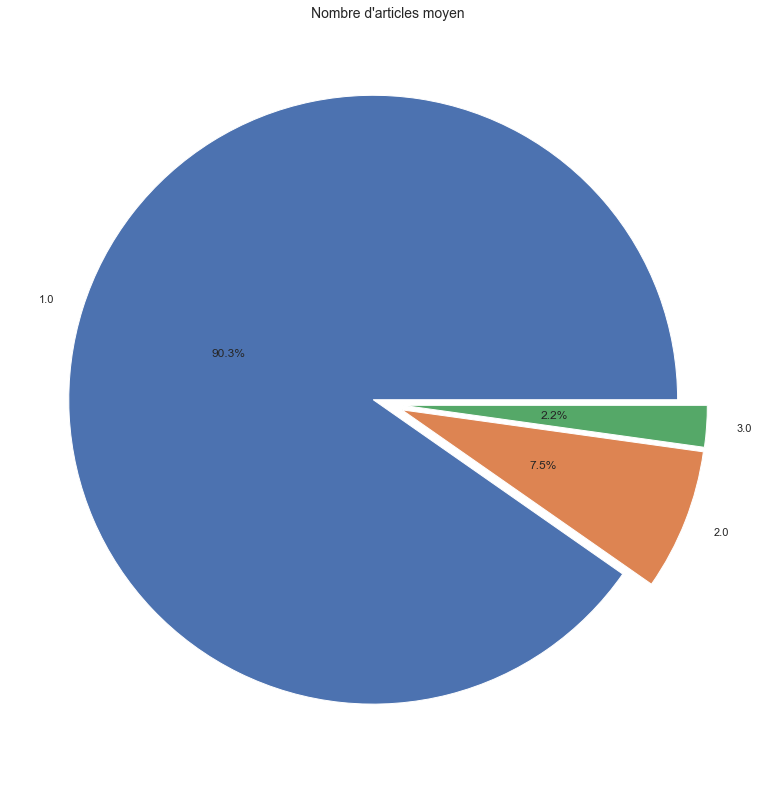

In [134]:
d = {"Nombre d'article moyen": Data_Client["Nb_Articles_Moyen"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("Nombre d'article moyen")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df, autopct="%.1f%%",
        explode=[0.05]*3,
        labels=labels,
        pctdistance=0.5)
plt.title("Nombre d'articles moyen", fontsize=14)

In [135]:
len(dataSetFinal["payment_type"].unique())

4

Text(0.5, 1.0, 'payment_type')

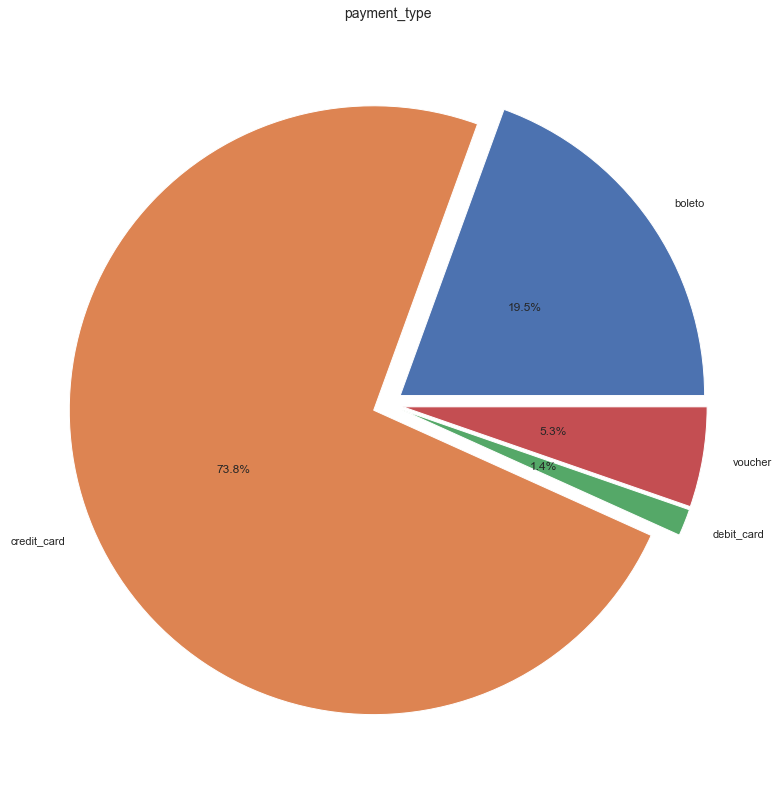

In [136]:
d = {"payment_type": dataSetFinal["payment_type"],
     'Compte': np.array([1 for i in range(len(dataSetFinal))])}
df = pd.DataFrame(data=d)

df = df.groupby("payment_type")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df,
        autopct="%.1f%%",
        explode=[0.05]*4,
        labels=labels,
        pctdistance=0.5)
plt.title("payment_type", fontsize=14)

In [137]:
Data_Client["Score Moyen"].unique()

array([5, 4, 3, 1, 2], dtype=int64)

In [138]:
d = {"Review Score": Data_Client["Score Moyen"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("Review Score")["Compte"].sum()

d2 = {"Review": ["1", "2",
                 "3", "4", "5"], "Compte": df}
df2 = pd.DataFrame(data=d2)

df2 = df2.sort_values(by="Review", ascending=False)

df2

Review  Compte
Review Score               
5                 5   53791
4                 4   18196
3                 3    7768
2                 2    2903
1                 1    9417

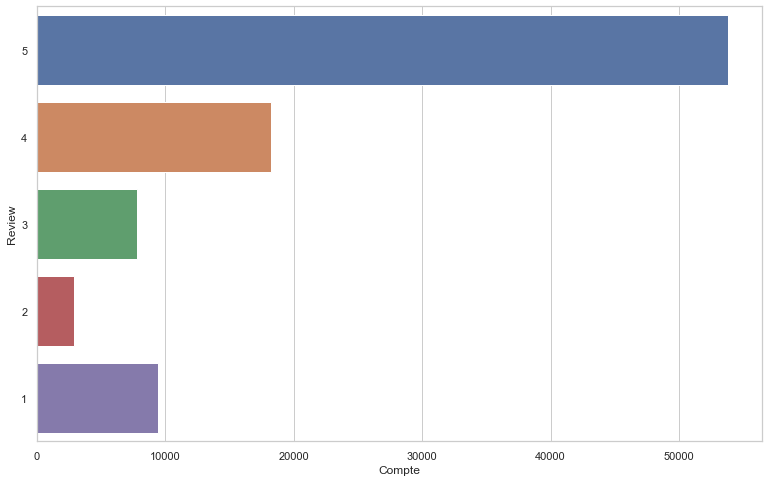

In [139]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=[13, 8])
ax = sns.barplot(y="Review",
                 x="Compte",
                 data=df2)

In [140]:
len(Data_Client["Delais_Livraison_Moyen"].unique())

247

<AxesSubplot:xlabel='Delais_Livraison_Moyen', ylabel='Count'>

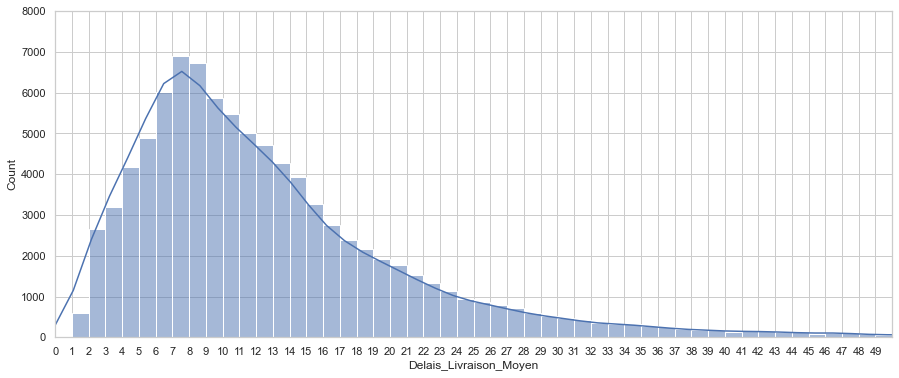

In [141]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=[15, 6])
axes = plt.gca()
axes.xaxis.set_ticks(range(0, 50, 1))
plt.axis([0, 50, 0, 8000])
sns.histplot(data=Data_Client,
             x="Delais_Livraison_Moyen",
             kde=True,
             binwidth=1)

In [257]:
np.mean(Data_Client["Delais_Livraison_Moyen"].unique())

54.22013045434098

In [256]:
max(Data_Client["Delais_Livraison_Moyen"].unique())

215.0

In [143]:
Data_Client["Nombre de Commandes"].unique()

array([ 1,  2,  3,  4,  6,  7,  5,  9, 14], dtype=int64)

Text(0.5, 1.0, 'Nombre de Commandes')

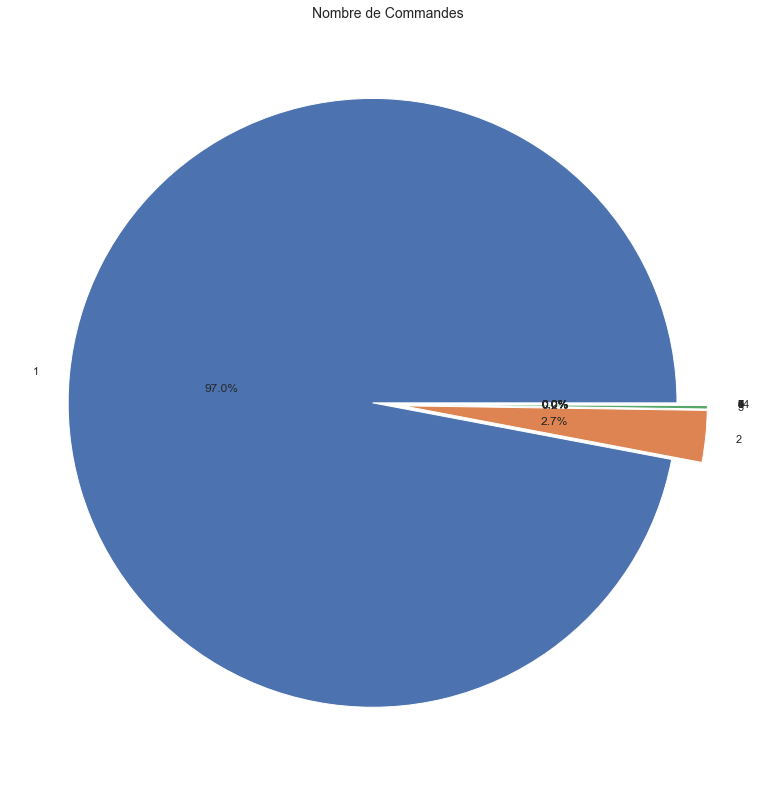

In [144]:
d = {"Nombre de Commandes": Data_Client["Nombre de Commandes"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("Nombre de Commandes")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df, autopct="%.1f%%",
        explode=[0.05]*9,
        labels=labels,
        pctdistance=0.5)
plt.title("Nombre de Commandes", fontsize=14)

In [145]:
d = {"Nombre de Commandes": Data_Client["Nombre de Commandes"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)
df = df.groupby("Nombre de Commandes")["Compte"].sum()

d2 = {"Nombre de Commandes_2": ["1", "2", "3", "4",
                                "5", "6", "7", "9", "14"],
      "Compte": df}

df2 = pd.DataFrame(data=d2)

df2 = df2.sort_values(by="Nombre de Commandes",
                      ascending=True)

df2

Nombre de Commandes_2  Compte
Nombre de Commandes                              
1                                       1   89333
2                                       2    2521
3                                       3     175
4                                       4      29
5                                       5       9
6                                       6       3
7                                       7       3
9                                       9       1
14                                     14       1

Text(0.5, 1.0, 'Nombre de Commandes')

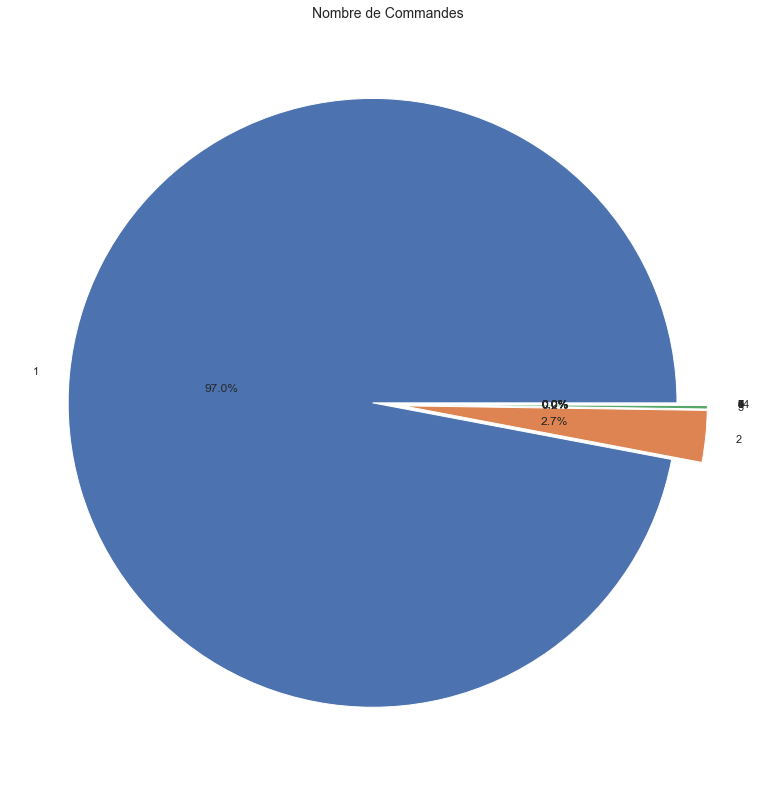

In [146]:
d = {"Nombre de Commandes": Data_Client["Nombre de Commandes"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("Nombre de Commandes")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df,
        autopct="%.1f%%",
        explode=[0.05]*9,
        labels=labels,
        pctdistance=0.5)
plt.title("Nombre de Commandes", fontsize=14)

In [147]:
len(Data_Client["payment_sequential"].unique())

31

In [148]:
max(Data_Client["payment_sequential"].unique())

26.0

Text(0.5, 1.0, 'payment_sequentials')

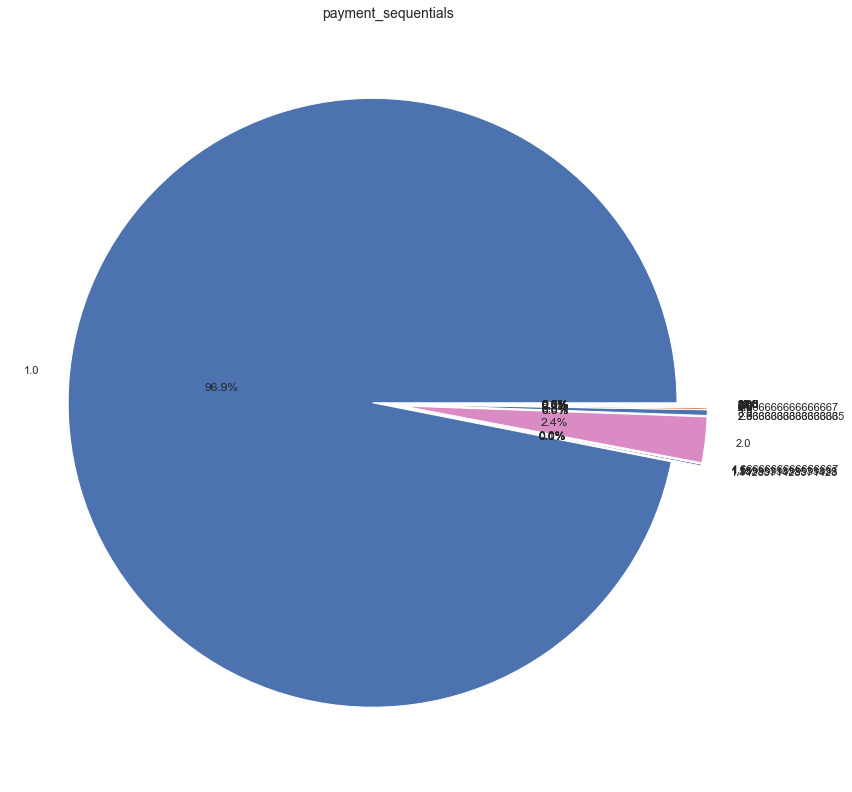

In [149]:
d = {"payment_sequential": Data_Client["payment_sequential"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("payment_sequential")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df,
        autopct="%.1f%%",
        explode=[0.05]*31,
        labels=labels,
        pctdistance=0.5)
plt.title("payment_sequentials", fontsize=14)

In [150]:
len(Data_Client["payment_installments"].unique())

70

Text(0.5, 1.0, 'payment_installments')

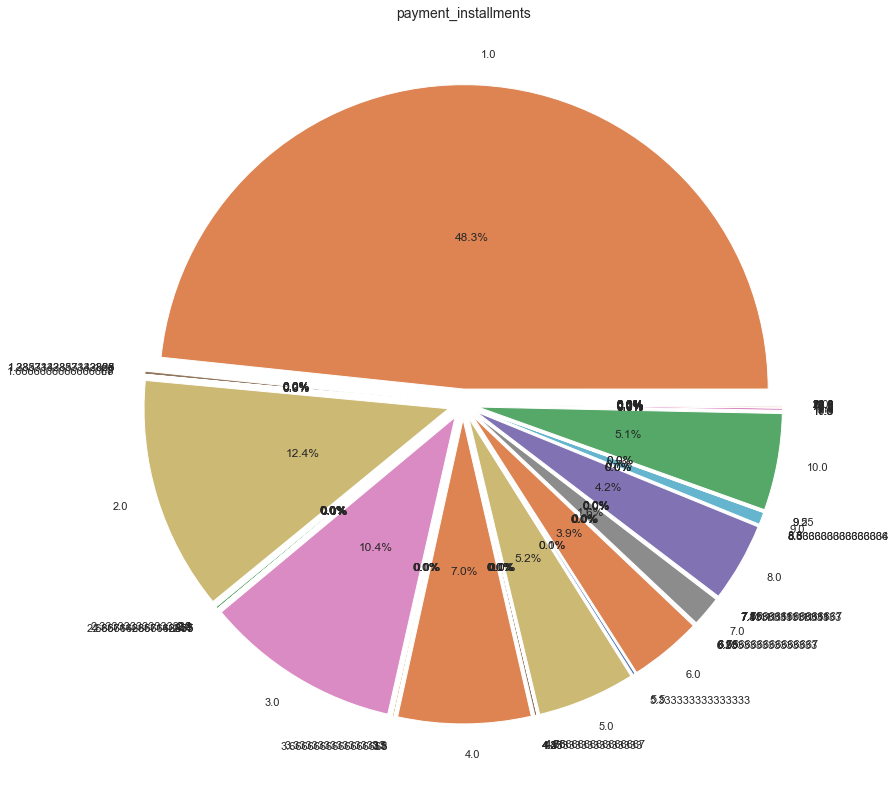

In [151]:
d = {"payment_installments": Data_Client["payment_installments"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("payment_installments")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df,
        autopct="%.1f%%",
        explode=[0.05]*70,
        labels=labels,
        pctdistance=0.5)
plt.title("payment_installments", fontsize=14)

In [152]:
Data_Client.loc[(Data_Client["payment_installments"] >= 1) &
                (Data_Client["payment_installments"] < 2),
                "payment_installments"] = 1
Data_Client.loc[(Data_Client["payment_installments"] >= 2) &
                (Data_Client["payment_installments"] < 3),
                "payment_installments"] = 2
Data_Client.loc[(Data_Client["payment_installments"] >= 3) &
                (Data_Client["payment_installments"] < 4),
                "payment_installments"] = 3
Data_Client.loc[(Data_Client["payment_installments"] >= 4) &
                (Data_Client["payment_installments"] < 5),
                "payment_installments"] = 4
Data_Client.loc[(Data_Client["payment_installments"] >= 5) &
                (Data_Client["payment_installments"] < 6),
                "payment_installments"] = 5
Data_Client.loc[(Data_Client["payment_installments"] >= 6) &
                (Data_Client["payment_installments"] < 7),
                "payment_installments"] = 6
Data_Client.loc[(Data_Client["payment_installments"] >= 7) &
                (Data_Client["payment_installments"] < 8),
                "payment_installments"] = 7
Data_Client.loc[(Data_Client["payment_installments"] >= 8) &
                (Data_Client["payment_installments"] < 9),
                "payment_installments"] = 8
Data_Client.loc[(Data_Client["payment_installments"] >= 9) &
                (Data_Client["payment_installments"] < 10),
                "payment_installments"] = 9
Data_Client.loc[Data_Client["payment_installments"] >= 10,
                "payment_installments"] = 10

In [153]:
len(Data_Client["payment_installments"].unique())

11

In [154]:
Data_Client["payment_installments"].unique()

array([ 8.,  1.,  4.,  6.,  3.,  2., 10.,  5.,  7.,  9.,  0.])

Text(0.5, 1.0, 'payment_installments')

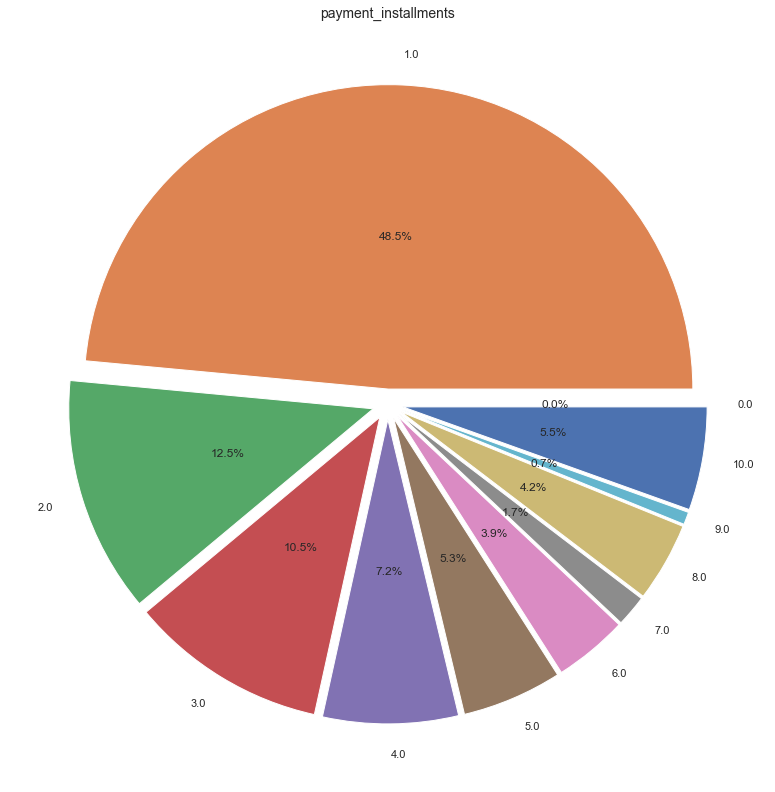

In [155]:
d = {"payment_installments": Data_Client["payment_installments"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("payment_installments")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df,
        autopct="%.1f%%",
        explode=[0.05]*11,
        labels=labels,
        pctdistance=0.5)
plt.title("payment_installments", fontsize=14)

In [156]:
len(Data_Client["product_weight_g"].unique())

3071

<AxesSubplot:xlabel='product_weight_g', ylabel='Count'>

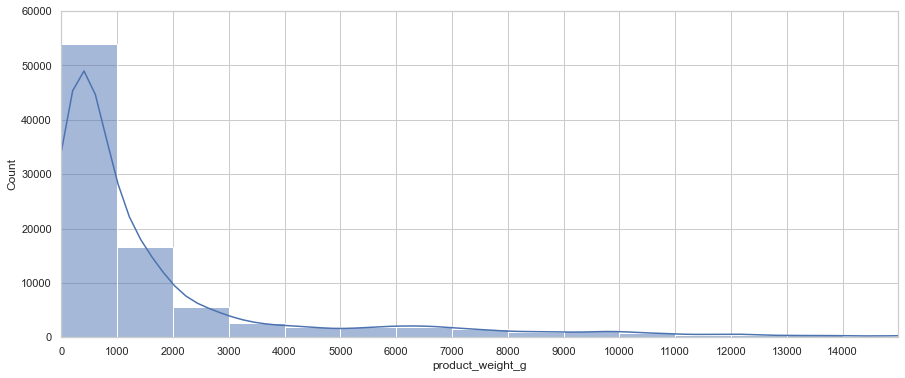

In [157]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=[15, 6])
axes = plt.gca()
axes.xaxis.set_ticks(range(0, 15000, 1000))
plt.axis([0, 15000, 0, 60000])
sns.histplot(data=Data_Client,
             x="product_weight_g",
             kde=True,
             binwidth=1000)

In [258]:
np.mean(Data_Client["product_weight_g"].unique())

4776.258798087111

In [158]:
max(Data_Client["product_weight_g"].unique())

40425.0

In [159]:
len(Data_Client["product_description_lenght"].unique())

4591

<AxesSubplot:xlabel='product_description_lenght', ylabel='Count'>

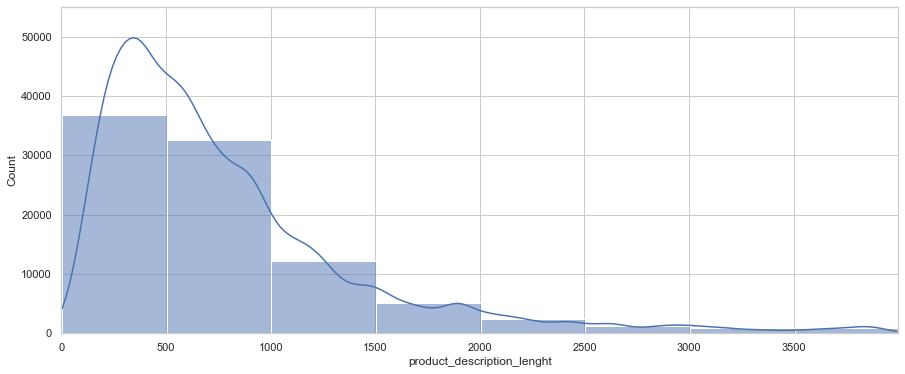

In [160]:
sns.set_theme(style="whitegrid")
ax = plt.subplots(figsize=[15, 6])
axes = plt.gca()
axes.xaxis.set_ticks(range(0, 4000, 500))
plt.axis([0, 4000, 0, 55000])
sns.histplot(data=Data_Client,
             x="product_description_lenght",
             kde=True,
             binwidth=500)

In [161]:
len(Data_Client["product_photos_qty"].unique())

93

Text(0.5, 1.0, 'product_photos_qty')

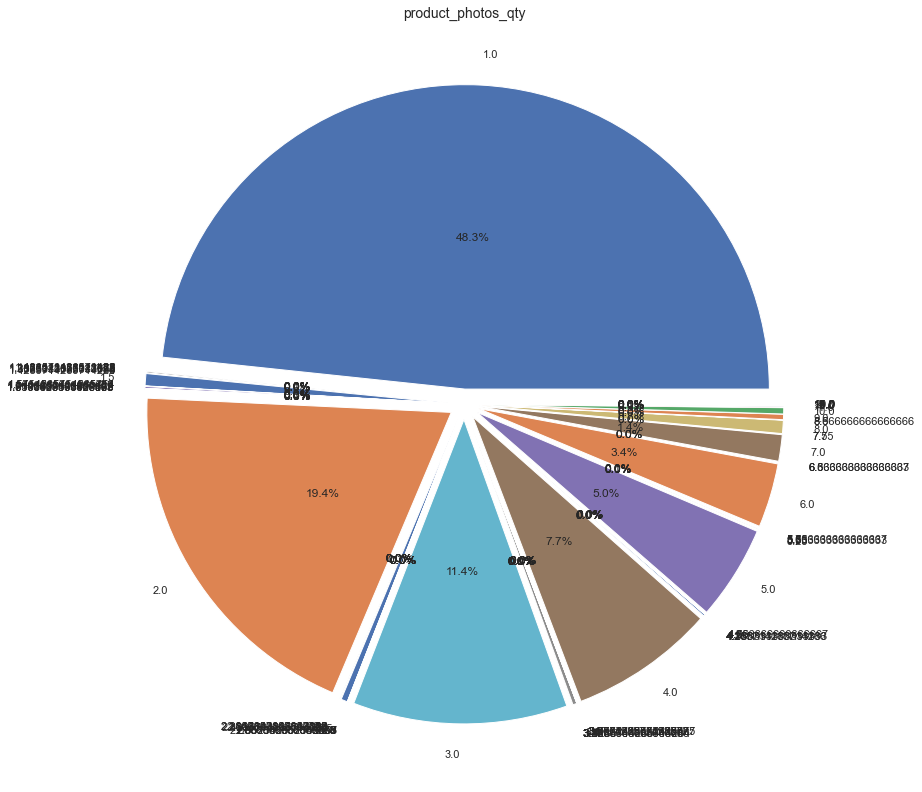

In [162]:
d = {"product_photos_qty": Data_Client["product_photos_qty"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("product_photos_qty")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df,
        autopct="%.1f%%",
        explode=[0.05]*93,
        labels=labels,
        pctdistance=0.5)
plt.title("product_photos_qty", fontsize=14)

In [163]:
Data_Client.loc[(Data_Client["product_photos_qty"] >= 1) &
                (Data_Client["product_photos_qty"] < 2),
                "product_photos_qty"] = 1
Data_Client.loc[(Data_Client["product_photos_qty"] >= 2) &
                (Data_Client["product_photos_qty"] < 3),
                "product_photos_qty"] = 2
Data_Client.loc[(Data_Client["product_photos_qty"] >= 3) &
                (Data_Client["product_photos_qty"] < 4),
                "product_photos_qty"] = 3
Data_Client.loc[(Data_Client["product_photos_qty"] >= 4) &
                (Data_Client["product_photos_qty"] < 5),
                "product_photos_qty"] = 4
Data_Client.loc[(Data_Client["product_photos_qty"] >= 5) &
                (Data_Client["product_photos_qty"] < 6),
                "product_photos_qty"] = 5
Data_Client.loc[(Data_Client["product_photos_qty"] >= 6) &
                (Data_Client["product_photos_qty"] < 7),
                "product_photos_qty"] = 6
Data_Client.loc[Data_Client["product_photos_qty"] >= 7,
                "product_photos_qty"] = 7

Text(0.5, 1.0, 'product_photos_qty')

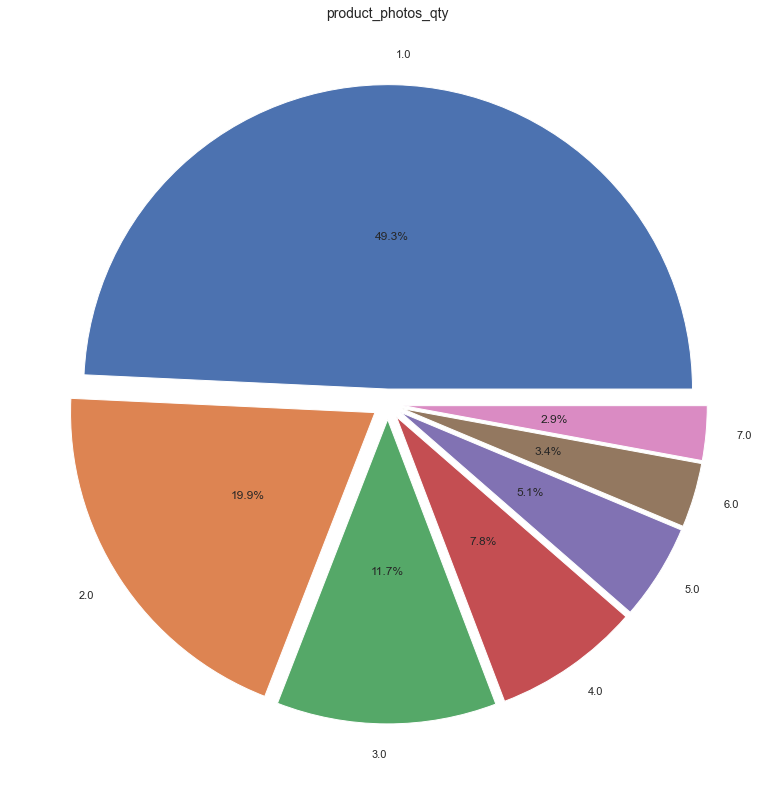

In [164]:
d = {"product_photos_qty": Data_Client["product_photos_qty"],
     'Compte': np.array([1 for i in range(len(Data_Client))])}
df = pd.DataFrame(data=d)

df = df.groupby("product_photos_qty")["Compte"].sum()

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df.keys()
plt.pie(x=df,
        autopct="%.1f%%",
        explode=[0.05]*7,
        labels=labels,
        pctdistance=0.5)
plt.title("product_photos_qty", fontsize=14)

In [165]:
Data_Client.head()

Unnamed: 0                customer_unique_id  Panier_Moyen  \
0           0  0000366f3b9a7992bf8c76cfdf3221e2        141.90   
1           1  0000b849f77a49e4a4ce2b2a4ca5be3f         27.19   
2           2  0000f46a3911fa3c0805444483337064         86.22   
3           3  0000f6ccb0745a6a4b88665a16c9f078         43.62   
4           4  0004aac84e0df4da2b147fca70cf8255        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  \
0                1.0            5                     6.0   
1                1.0            4                     3.0   
2                1.0            3                    26.0   
3                1.0            4                    20.0   
4                1.0            5                    13.0   

   Nombre de Commandes  payment_sequential  payment_installments  \
0                    1                 1.0                   8.0   
1                    1                 1.0                   1.0   
2                    1                 1.0                   8.0   
3                    1                 1.0                   4.0   
4                    1                 1.0                   6.0   

   product_weight_g  product_description_lenght  product_photos_qty  boleto  \
0            1500.0                       236.0                 1.0       0   
1             375.0                       635.0                 1.0       0   
2            1500.0                       177.0                 3.0       0   
3             150.0                      1741.0                 5.0       0   
4            6050.0                       794.0                 3.0       0   

   credit_card  debit_card  voucher  
0            1           0        0  
1            1           0        0  
2            1           0        0  
3            1           0        0  
4            1           0        0

In [166]:
Data_Client["Compte"] = 'a'

In [167]:
Data_Client.head()

Unnamed: 0                customer_unique_id  Panier_Moyen  \
0           0  0000366f3b9a7992bf8c76cfdf3221e2        141.90   
1           1  0000b849f77a49e4a4ce2b2a4ca5be3f         27.19   
2           2  0000f46a3911fa3c0805444483337064         86.22   
3           3  0000f6ccb0745a6a4b88665a16c9f078         43.62   
4           4  0004aac84e0df4da2b147fca70cf8255        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  \
0                1.0            5                     6.0   
1                1.0            4                     3.0   
2                1.0            3                    26.0   
3                1.0            4                    20.0   
4                1.0            5                    13.0   

   Nombre de Commandes  payment_sequential  payment_installments  \
0                    1                 1.0                   8.0   
1                    1                 1.0                   1.0   
2                    1                 1.0                   8.0   
3                    1                 1.0                   4.0   
4                    1                 1.0                   6.0   

   product_weight_g  product_description_lenght  product_photos_qty  boleto  \
0            1500.0                       236.0                 1.0       0   
1             375.0                       635.0                 1.0       0   
2            1500.0                       177.0                 3.0       0   
3             150.0                      1741.0                 5.0       0   
4            6050.0                       794.0                 3.0       0   

   credit_card  debit_card  voucher Compte  
0            1           0        0      a  
1            1           0        0      a  
2            1           0        0      a  
3            1           0        0      a  
4            1           0        0      a

Text(0.5, 1.0, 'payment_type')

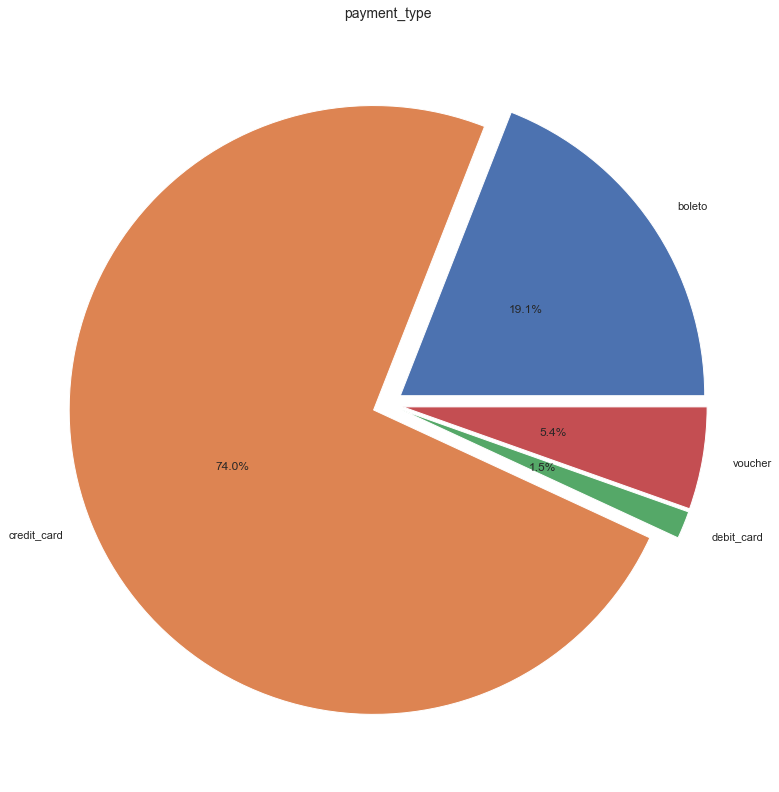

In [168]:
cles = ["Compte"]

dico = {'boleto':'sum',
        'credit_card':'sum',
        'debit_card':'sum',
        'voucher':'sum'}

tab = Data_Client.groupby(cles, as_index=False).agg(dico)

d = pd.DataFrame(tab)


d = d.drop('Compte', axis = 1)

df = {'boleto':d.loc[0,'boleto'],
      'credit_card':d.loc[0,'credit_card'],
      'debit_card':d.loc[0,'debit_card'],
      'voucher':d.loc[0,'voucher']}

df2 = pd.Series(data = df,index=['boleto',
                                 'credit_card',
                                 'debit_card',
                                 'voucher'])

%matplotlib inline
sns.set_theme(style="whitegrid")
pie, ax = plt.subplots(figsize=[20, 14])
labels = df2.keys()
plt.pie(x=df2,
        autopct="%.1f%%",
        explode=[0.05]*4,
        labels=labels,
        pctdistance=0.5)
plt.title("payment_type", fontsize=14)

In [169]:
Data_Client = Data_Client.drop("Compte", axis=1)

In [170]:
Data_Client = Data_Client.drop("Unnamed: 0", axis=1)

In [171]:
Data_Client.head()

customer_unique_id  Panier_Moyen  Nb_Articles_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2        141.90                1.0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f         27.19                1.0   
2  0000f46a3911fa3c0805444483337064         86.22                1.0   
3  0000f6ccb0745a6a4b88665a16c9f078         43.62                1.0   
4  0004aac84e0df4da2b147fca70cf8255        196.89                1.0   

   Score Moyen  Delais_Livraison_Moyen  Nombre de Commandes  \
0            5                     6.0                    1   
1            4                     3.0                    1   
2            3                    26.0                    1   
3            4                    20.0                    1   
4            5                    13.0                    1   

   payment_sequential  payment_installments  product_weight_g  \
0                 1.0                   8.0            1500.0   
1                 1.0                   1.0             375.0   
2                 1.0                   8.0            1500.0   
3                 1.0                   4.0             150.0   
4                 1.0                   6.0            6050.0   

   product_description_lenght  product_photos_qty  boleto  credit_card  \
0                       236.0                 1.0       0            1   
1                       635.0                 1.0       0            1   
2                       177.0                 3.0       0            1   
3                      1741.0                 5.0       0            1   
4                       794.0                 3.0       0            1   

   debit_card  voucher  
0           0        0  
1           0        0  
2           0        0  
3           0        0  
4           0        0

In [172]:
Data_Client.to_csv("Data_Client.csv")

In [173]:
Data_Client.head(1000)

customer_unique_id  Panier_Moyen  Nb_Articles_Moyen  \
0    0000366f3b9a7992bf8c76cfdf3221e2       141.900                1.0   
1    0000b849f77a49e4a4ce2b2a4ca5be3f        27.190                1.0   
2    0000f46a3911fa3c0805444483337064        86.220                1.0   
3    0000f6ccb0745a6a4b88665a16c9f078        43.620                1.0   
4    0004aac84e0df4da2b147fca70cf8255       196.890                1.0   
5    0004bd2a26a76fe21f786e4fbd80607f       166.980                1.0   
6    00050ab1314c0e55a6ca13cf7181fecf        35.380                1.0   
7    00053a61a98854899e70ed204dd4bafe       419.180                2.0   
8    0005e1862207bf6ccc02e4228effd9a0       150.120                1.0   
9    0005ef4cd20d2893f0d9fbd94d3c0d97       129.760                1.0   
10   0006fdc98a402fceb4eb0ee528f6a8d4        29.000                1.0   
11   00082cbe03e478190aadbea78542e933       126.260                1.0   
12   00090324bbad0e9342388303bb71ba0a        63.660                1.0   
13   000949456b182f53c18b68d6babc79c1        82.050                1.0   
14   000a5ad9c4601d2bbdd9ed765d5213b3        91.280                1.0   
15   000bfa1d2f1a41876493be685390d6d3        46.850                1.0   
16   000c8bdb58a29e7115cfc257230fb21b        29.000                1.0   
17   000d460961d6dbfa3ec6c9f5805769e1        36.680                1.0   
18   000de6019bb59f34c099a907c151d855       257.440                2.0   
19   000e309254ab1fc5ba99dd469d36bdb4        78.420                1.0   
20   000ec5bff359e1c0ad76a81a45cb598f        27.750                1.0   
21   000ed48ceeb6f4bf8ad021a10a3c7b43        20.750                1.0   
22   000fbf0473c10fc1ab6f8d2d286ce20c       362.360                3.0   
23   0010a452c6d13139e50b57f19f52e04e       325.930                1.0   
24   0010fb34b966d44409382af9e8fd5b77        61.800                1.0   
25   001147e649a7b1afd577e873841632dd       212.160                2.0   
26   00115fc7123b5310cf6d3a3aa932699e        76.110                1.0   
27   0011805441c0d1b68b48002f1d005526       297.140                1.0   
28   0011857aff0e5871ce5eb429f21cdaf5       192.830                1.0   
29   0011c98589159d6149979563c504cb21       117.940                1.0   
30   0012929d977a8d7280bb277c1e5f589d       155.650                1.0   
31   0014a5a58da615f7b01a4f5e194bf5ea        99.820                1.0   
32   0015752e079902b12cd00b9b7596276b        74.820                2.0   
33   00172711b30d52eea8b313a7f2cced02       122.070                1.0   
34   00191a9719ef48ebb5860b130347bf33        58.860                1.0   
35   001926cef41060fae572e2e7b30bd2a4        91.210                2.0   
36   001928b561575b2821c92254a2327d06       164.810                2.0   
37   00196c4c9a3af7dd2ad10eade69c926f        37.580                1.0   
38   00196fdb2bf9edfc35e88ebfbcf8d781        27.000                1.0   
39   0019da6aa6bcb27cc32f1249bd12da05        87.710                1.0   
40   0019e8c501c85848ac0966d45226fa1d       197.270                1.0   
41   001a2bf0e46c684031af91fb2bce149d        36.730                1.0   
42   001a34eb30ecb8e3aacb07c475ca4dd1       161.710                1.0   
43   001a3a8e11d76c9a366c31a4aa2cc529        24.230                1.0   
44   001ae5a1788703d64536c30362503e49       135.080                1.0   
45   001deb796b28a3a128d6113857569aa4        63.330                1.0   
46   001f3c4211216384d5fe59b041ce1461        35.840                1.0   
47   002043098f10ba39a4600b6c52fbfe3c       237.810                1.0   
48   002311514717ca8b65b09a26cdf7b91a       124.320                1.0   
49   0023557a94bef0038066b5d1b3dc763e       107.440                1.0   
50   002471155ecd08d208d1376720e2a907        92.180                1.0   
51   00256bf7b05c08f6a5849df3d0a64f1f        57.730                1.0   
52   0025795df7a7d077c4c90162fa820085       214.080                2.0   
53   0027324a96d26a2bc7

## Analyse PCA

In [174]:
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [175]:
Data_Client.columns

Index(['customer_unique_id', 'Panier_Moyen', 'Nb_Articles_Moyen',
       'Score Moyen', 'Delais_Livraison_Moyen', 'Nombre de Commandes',
       'payment_sequential', 'payment_installments', 'product_weight_g',
       'product_description_lenght', 'product_photos_qty', 'boleto',
       'credit_card', 'debit_card', 'voucher'],
      dtype='object')

In [176]:
# choix du nombre de composantes à calculer
n_comp = 10

In [177]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = Data_Client[[
                     'Panier_Moyen',
                     'Nb_Articles_Moyen',
                     'Score Moyen',
                     'Delais_Livraison_Moyen',
                     'Nombre de Commandes',
                     'payment_sequential',
                     'payment_installments',
                     'product_weight_g',
                     'product_description_lenght',
                     'product_photos_qty']]

In [178]:
names = Data_Client.index

In [179]:
names

RangeIndex(start=0, stop=92075, step=1)

In [180]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean())
X = data_pca.values
X

array([[1.4190e+02, 1.0000e+00, 5.0000e+00, ..., 1.5000e+03, 2.3600e+02,
        1.0000e+00],
       [2.7190e+01, 1.0000e+00, 4.0000e+00, ..., 3.7500e+02, 6.3500e+02,
        1.0000e+00],
       [8.6220e+01, 1.0000e+00, 3.0000e+00, ..., 1.5000e+03, 1.7700e+02,
        3.0000e+00],
       ...,
       [1.1246e+02, 1.0000e+00, 5.0000e+00, ..., 6.0000e+02, 7.1600e+02,
        5.0000e+00],
       [1.3369e+02, 1.0000e+00, 5.0000e+00, ..., 4.4400e+02, 5.9100e+02,
        3.0000e+00],
       [7.1560e+01, 1.0000e+00, 5.0000e+00, ..., 4.0000e+02, 1.0030e+03,
        2.0000e+00]])

In [181]:
features = data_pca.columns

In [182]:
X_Scaled = preprocessing.StandardScaler().fit_transform(X)

In [183]:
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_Scaled)

PCA(n_components=10)

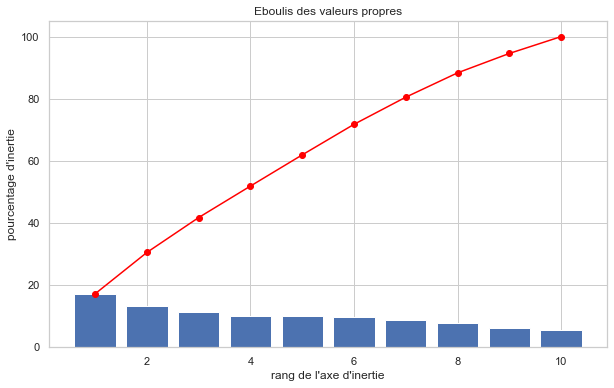

In [184]:
# Eboulis des valeurs propres
plt.figure(figsize=[10, 6])
display_scree_plot(pca)

In [185]:
# Cercle des corrélations
pcs = pca.components_

<Figure size 2880x1728 with 0 Axes>

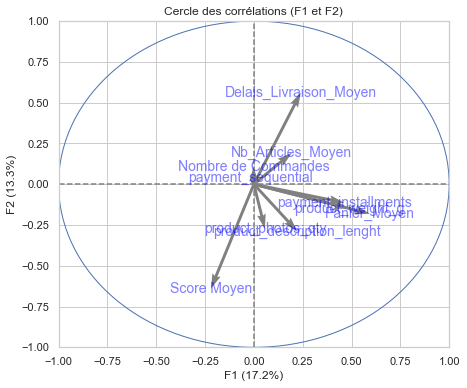

In [186]:
plt.figure(figsize=[40, 24])
display_circles(pcs, n_comp, pca, [(0, 1)], labels=np.array(features))

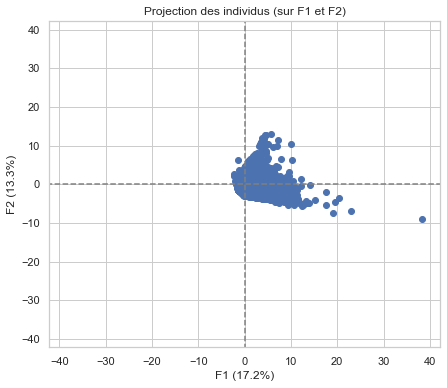

In [187]:
# Projection des individus
X_projected = pca.transform(X_Scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0, 1)])

## Agrégats Client: On construit les agrégats au niveau de chaque client en distinguant les différentes périodes (Année + Mois) aucours desquelles il a réalisé ses achats/commandes

### Panier Moyen par client, par mois

In [188]:
cles = ["customer_unique_id",
        "order_id",
        "order_item_id",
        "product_id",
        "order_purchase_timestamp"]

cle5 = 'Prix_Produit_Freight'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Client_Periodes = pd.DataFrame(tab)

In [189]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Client_Periodes.loc[Data_Client_Periodes["customer_unique_id"] == num]

customer_unique_id                          order_id  \
65539  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
65540  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65541  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65542  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       order_item_id                        product_id  \
65539              1  4eb99b5f0d7e411f246a5c9c0ae27a5e   
65540              1  ebf9bc6cd600eadd681384e3116fda85   
65541              2  ebf9bc6cd600eadd681384e3116fda85   
65542              3  5ddab10d5e0a23acb99acf56b62b3276   

      order_purchase_timestamp  Prix_Produit_Freight  
65539      2017-07-27 12:50:46                 72.17  
65540      2017-08-08 20:26:31                 36.20  
65541      2017-08-08 20:26:31                 36.20  
65542      2017-08-08 20:26:31                 88.92

In [190]:
dt_client = Data_Client_Periodes["order_purchase_timestamp"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)

dico = {0: 'Annee_Client',
        1: 'Mois_Client',
        2: 'Jour_Client'}

dt_client.rename(columns=dico, inplace=True)

tab1 = dt_client["Annee_Client"].astype(int)
dt_client["Annee_Client"] = tab1

tab2 = dt_client["Mois_Client"].astype(int)
dt_client["Mois_Client"] = tab2

tab3 = dt_client["Jour_Client"].astype(int)
dt_client["Jour_Client"] = tab3

tab5 = dt_client["Annee_Client"]
tab6 = dt_client["Mois_Client"]

Data_Client_Periodes["Annee_Client"] = tab5
Data_Client_Periodes["Mois_Client"] = tab6

In [191]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Client_Periodes.loc[Data_Client_Periodes["customer_unique_id"] == num]

customer_unique_id                          order_id  \
65539  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
65540  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65541  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65542  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       order_item_id                        product_id  \
65539              1  4eb99b5f0d7e411f246a5c9c0ae27a5e   
65540              1  ebf9bc6cd600eadd681384e3116fda85   
65541              2  ebf9bc6cd600eadd681384e3116fda85   
65542              3  5ddab10d5e0a23acb99acf56b62b3276   

      order_purchase_timestamp  Prix_Produit_Freight  Annee_Client  \
65539      2017-07-27 12:50:46                 72.17          2017   
65540      2017-08-08 20:26:31                 36.20          2017   
65541      2017-08-08 20:26:31                 36.20          2017   
65542      2017-08-08 20:26:31                 88.92          2017   

       Mois_Client  
65539            7  
65540            8  
65541            8  
65542            8

In [192]:
cles = ["customer_unique_id",
        "order_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'Prix_Produit_Freight'

tab = Data_Client_Periodes.groupby(cles, as_index=False).agg({cle5:'sum'})

Data_Client_Periodes = pd.DataFrame(tab)


num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Client_Periodes.loc[Data_Client_Periodes["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       Annee_Client  Mois_Client  Prix_Produit_Freight  
57445          2017            7                 72.17  
57446          2017            8                161.32

In [193]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'Prix_Produit_Freight'

tab = Data_Client_Periodes.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Client_Periodes = pd.DataFrame(tab)


num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Client_Periodes.loc[Data_Client_Periodes["customer_unique_id"] == num, :]

customer_unique_id  Annee_Client  Mois_Client  \
56686  9a736b248f67d166d2fbb006bcb877c3          2017            7   
56687  9a736b248f67d166d2fbb006bcb877c3          2017            8   

       Prix_Produit_Freight  
56686                 72.17  
56687                161.32

### Nombre d'articles moyen par client, par mois

In [194]:
cles = ["customer_unique_id",
        "order_id",
        "order_item_id",
        "product_id",
        "order_purchase_timestamp"]

cle5 = 'Prix_Produit_Freight'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Nb_Art_Periodes = pd.DataFrame(tab)

In [195]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Nb_Art_Periodes.loc[Data_Nb_Art_Periodes["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
65539  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
65540  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65541  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65542  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       order_item_id                        product_id  \
65539              1  4eb99b5f0d7e411f246a5c9c0ae27a5e   
65540              1  ebf9bc6cd600eadd681384e3116fda85   
65541              2  ebf9bc6cd600eadd681384e3116fda85   
65542              3  5ddab10d5e0a23acb99acf56b62b3276   

      order_purchase_timestamp  Prix_Produit_Freight  
65539      2017-07-27 12:50:46                 72.17  
65540      2017-08-08 20:26:31                 36.20  
65541      2017-08-08 20:26:31                 36.20  
65542      2017-08-08 20:26:31                 88.92

In [196]:
dt_client = Data_Nb_Art_Periodes["order_purchase_timestamp"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)

dico = {0: 'Annee_Client',
        1: 'Mois_Client',
        2: 'Jour_Client'}

dt_client.rename(columns=dico, inplace=True)

tab1 = dt_client["Annee_Client"].astype(int)
dt_client["Annee_Client"] = tab1

tab2 = dt_client["Mois_Client"].astype(int)
dt_client["Mois_Client"] = tab2

tab3 = dt_client["Jour_Client"].astype(int)
dt_client["Jour_Client"] = tab3

tab5 = dt_client["Annee_Client"]
tab6 = dt_client["Mois_Client"]

Data_Nb_Art_Periodes["Annee_Client"] = tab5
Data_Nb_Art_Periodes["Mois_Client"] = tab6

In [197]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Nb_Art_Periodes.loc[Data_Nb_Art_Periodes["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
65539  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
65540  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65541  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
65542  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       order_item_id                        product_id  \
65539              1  4eb99b5f0d7e411f246a5c9c0ae27a5e   
65540              1  ebf9bc6cd600eadd681384e3116fda85   
65541              2  ebf9bc6cd600eadd681384e3116fda85   
65542              3  5ddab10d5e0a23acb99acf56b62b3276   

      order_purchase_timestamp  Prix_Produit_Freight  Annee_Client  \
65539      2017-07-27 12:50:46                 72.17          2017   
65540      2017-08-08 20:26:31                 36.20          2017   
65541      2017-08-08 20:26:31                 36.20          2017   
65542      2017-08-08 20:26:31                 88.92          2017   

       Mois_Client  
65539            7  
65540            8  
65541            8  
65542            8

In [198]:
cles = ["customer_unique_id",
        "order_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'order_item_id'

tab = Data_Nb_Art_Periodes.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Nb_Art_Periodes = pd.DataFrame(tab)

num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Nb_Art_Periodes.loc[Data_Nb_Art_Periodes["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       Annee_Client  Mois_Client  order_item_id  
57445          2017            7              1  
57446          2017            8              3

In [199]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'order_item_id'

tab = Data_Nb_Art_Periodes.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Nb_Art_Periodes = pd.DataFrame(tab)


dico = {'order_item_id': 'Nb_Articles_Moyen'}
Data_Nb_Art_Periodes.rename(columns=dico, inplace=True)


num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Nb_Art_Periodes.loc[Data_Nb_Art_Periodes["customer_unique_id"] == num, :]

customer_unique_id  Annee_Client  Mois_Client  \
56686  9a736b248f67d166d2fbb006bcb877c3          2017            7   
56687  9a736b248f67d166d2fbb006bcb877c3          2017            8   

       Nb_Articles_Moyen  
56686                1.0  
56687                3.0

In [200]:
tab1 = Data_Nb_Art_Periodes
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]


Data_Client_Periodes = pd.merge(Data_Client_Periodes, tab1, on=cles)

In [201]:
Data_Client_Periodes.head()

customer_unique_id  Annee_Client  Mois_Client  \
0  0000366f3b9a7992bf8c76cfdf3221e2          2018            5   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          2018            5   
2  0000f46a3911fa3c0805444483337064          2017            3   
3  0000f6ccb0745a6a4b88665a16c9f078          2017           10   
4  0004aac84e0df4da2b147fca70cf8255          2017           11   

   Prix_Produit_Freight  Nb_Articles_Moyen  
0                141.90                1.0  
1                 27.19                1.0  
2                 86.22                1.0  
3                 43.62                1.0  
4                196.89                1.0

### Review moyenne par client, par mois

In [202]:
cles = ["customer_unique_id",
        "order_id",
        "order_purchase_timestamp"]

cle5 = 'review_score'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'min'})

Data_review_Periodes = pd.DataFrame(tab)

In [203]:
num = "08f7cf00ed9ff3e0a08fc136ec272974"
Data_review_Periodes.loc[Data_review_Periodes["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
3391  08f7cf00ed9ff3e0a08fc136ec272974  1f80ad89393a17282085bcd14644e45a   
3392  08f7cf00ed9ff3e0a08fc136ec272974  f9c78e6e58306dc81efbbada1ac11f24   

     order_purchase_timestamp  review_score  
3391      2017-09-01 22:26:18             3  
3392      2017-09-01 22:26:18             2

In [204]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_review_Periodes.loc[Data_review_Periodes["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
57445  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
57446  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

      order_purchase_timestamp  review_score  
57445      2017-07-27 12:50:46             5  
57446      2017-08-08 20:26:31             5

In [205]:
dt_client = Data_review_Periodes["order_purchase_timestamp"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)

dico = {0: 'Annee_Client',
        1: 'Mois_Client',
        2: 'Jour_Client'}

dt_client.rename(columns=dico, inplace=True)


tab1 = dt_client["Annee_Client"].astype(int)
dt_client["Annee_Client"] = tab1

tab2 = dt_client["Mois_Client"].astype(int)
dt_client["Mois_Client"] = tab2

tab3 = dt_client["Jour_Client"].astype(int)
dt_client["Jour_Client"] = tab3

tab5 = dt_client["Annee_Client"]
tab6 = dt_client["Mois_Client"]

Data_review_Periodes["Annee_Client"] = tab5
Data_review_Periodes["Mois_Client"] = tab6

In [206]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'review_score'

tab = Data_review_Periodes.groupby(cles, as_index=False).agg({cle5:'min'})

Data_review_Periodes_2 = pd.DataFrame(tab)

In [207]:
tab1 = Data_review_Periodes_2
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

Data_Client_Periodes = pd.merge(Data_Client_Periodes, tab1, on=cles)

In [208]:
Data_Client_Periodes.head()

customer_unique_id  Annee_Client  Mois_Client  \
0  0000366f3b9a7992bf8c76cfdf3221e2          2018            5   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          2018            5   
2  0000f46a3911fa3c0805444483337064          2017            3   
3  0000f6ccb0745a6a4b88665a16c9f078          2017           10   
4  0004aac84e0df4da2b147fca70cf8255          2017           11   

   Prix_Produit_Freight  Nb_Articles_Moyen  review_score  
0                141.90                1.0             5  
1                 27.19                1.0             4  
2                 86.22                1.0             3  
3                 43.62                1.0             4  
4                196.89                1.0             5

### Délais de livraison Moyen par client, par mois

In [209]:
cles = ["customer_unique_id",
        "order_id",
        "order_purchase_timestamp"]

cle5 = 'Delais_Livraison'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Delais_Livraison_Periodes = pd.DataFrame(tab)

In [210]:
dt_client = Data_Delais_Livraison_Periodes["order_purchase_timestamp"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)

dico = {0: 'Annee_Client',
        1: 'Mois_Client',
        2: 'Jour_Client'}

dt_client.rename(columns=dico, inplace=True)


tab1 = dt_client["Annee_Client"].astype(int)
dt_client["Annee_Client"] = tab1

tab2 = dt_client["Mois_Client"].astype(int)
dt_client["Mois_Client"] = tab2

tab3 = dt_client["Jour_Client"].astype(int)
dt_client["Jour_Client"] = tab3


tab5 = dt_client["Annee_Client"]
tab6 = dt_client["Mois_Client"]

Data_Delais_Livraison_Periodes["Annee_Client"] = tab5
Data_Delais_Livraison_Periodes["Mois_Client"] = tab6

In [211]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'Delais_Livraison'

tab = Data_Delais_Livraison_Periodes.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Delais_Livraison_Periodes_2 = pd.DataFrame(tab)

In [212]:
len(Data_Delais_Livraison_Periodes_2)

93870

In [213]:
len(Data_Delais_Livraison_Periodes)

95124

In [214]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

tab1 = Data_Delais_Livraison_Periodes_2

Data_Client_Periodes = pd.merge(Data_Client_Periodes, tab1, on=cles)

dico = {'review_score': 'Score Moyen',
        'Delais_Livraison': 'Delais_Livraison_Moyen',
        'Prix_Produit_Freight': 'Panier_Moyen'}

Data_Client_Periodes.rename(columns=dico, inplace=True)

In [215]:
Data_Client_Periodes.head()

customer_unique_id  Annee_Client  Mois_Client  Panier_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2          2018            5        141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          2018            5         27.19   
2  0000f46a3911fa3c0805444483337064          2017            3         86.22   
3  0000f6ccb0745a6a4b88665a16c9f078          2017           10         43.62   
4  0004aac84e0df4da2b147fca70cf8255          2017           11        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  
0                1.0            5                     6.0  
1                1.0            4                     3.0  
2                1.0            3                    26.0  
3                1.0            4                    20.0  
4                1.0            5                    13.0

### Payment_Installments Moyen par client

In [216]:
cles = ["customer_unique_id",
        "order_id",
        "order_purchase_timestamp"]

cle5 = 'payment_installments'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_payment_installments = pd.DataFrame(tab)

In [217]:
dt_client = Data_payment_installments["order_purchase_timestamp"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)

dico = {0: 'Annee_Client',
        1: 'Mois_Client',
        2: 'Jour_Client'}

dt_client.rename(columns=dico, inplace=True)


tab1 = dt_client["Annee_Client"].astype(int)
dt_client["Annee_Client"] = tab1

tab2 = dt_client["Mois_Client"].astype(int)
dt_client["Mois_Client"] = tab2

tab3 = dt_client["Jour_Client"].astype(int)
dt_client["Jour_Client"] = tab3


tab5 = dt_client["Annee_Client"]
tab6 = dt_client["Mois_Client"]
Data_payment_installments["Annee_Client"] = tab5
Data_payment_installments["Mois_Client"] = tab6

In [218]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'payment_installments'

tab = Data_payment_installments.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_payment_installments = pd.DataFrame(tab)

In [219]:
len(Data_payment_installments)

93870

In [220]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

tab1 = Data_payment_installments

Data_Client_Periodes = pd.merge(Data_Client_Periodes, tab1, on=cles)

In [221]:
len(Data_Client_Periodes)

93870

In [222]:
Data_Client_Periodes.head()

customer_unique_id  Annee_Client  Mois_Client  Panier_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2          2018            5        141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          2018            5         27.19   
2  0000f46a3911fa3c0805444483337064          2017            3         86.22   
3  0000f6ccb0745a6a4b88665a16c9f078          2017           10         43.62   
4  0004aac84e0df4da2b147fca70cf8255          2017           11        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  \
0                1.0            5                     6.0   
1                1.0            4                     3.0   
2                1.0            3                    26.0   
3                1.0            4                    20.0   
4                1.0            5                    13.0   

   payment_installments  
0                   8.0  
1                   1.0  
2                   8.0  
3                   4.0  
4                   6.0

### Poids Moyen du produit par client, par mois

In [223]:
cles = ["customer_unique_id",
        "product_id",
        "order_purchase_timestamp"]

cle5 = 'product_weight_g'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Poids_Produit_Periodes = pd.DataFrame(tab)

In [224]:
max(Data_Poids_Produit_Periodes["product_weight_g"])

40425.0

In [225]:
dt_client = Data_Poids_Produit_Periodes["order_purchase_timestamp"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)

dico = {0: 'Annee_Client', 1: 'Mois_Client', 2: 'Jour_Client'}
dt_client.rename(columns=dico, inplace=True)


tab1 = dt_client["Annee_Client"].astype(int)
dt_client["Annee_Client"] = tab1

tab2 = dt_client["Mois_Client"].astype(int)
dt_client["Mois_Client"] = tab2

tab3 = dt_client["Jour_Client"].astype(int)
dt_client["Jour_Client"] = tab3


tab5 = dt_client["Annee_Client"]
tab6 = dt_client["Mois_Client"]

Data_Poids_Produit_Periodes["Annee_Client"] = tab5
Data_Poids_Produit_Periodes["Mois_Client"] = tab6

In [226]:
len(Data_Poids_Produit_Periodes)

98742

In [227]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'product_weight_g'

tab = Data_Poids_Produit_Periodes.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Poids_Produit_Periodes = pd.DataFrame(tab)

In [228]:
len(Data_Poids_Produit_Periodes)

93870

In [229]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

tab1 = Data_Poids_Produit_Periodes


Data_Client_Periodes = pd.merge(Data_Client_Periodes, tab1, on=cles)

In [230]:
Data_Client_Periodes.head()

customer_unique_id  Annee_Client  Mois_Client  Panier_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2          2018            5        141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          2018            5         27.19   
2  0000f46a3911fa3c0805444483337064          2017            3         86.22   
3  0000f6ccb0745a6a4b88665a16c9f078          2017           10         43.62   
4  0004aac84e0df4da2b147fca70cf8255          2017           11        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  \
0                1.0            5                     6.0   
1                1.0            4                     3.0   
2                1.0            3                    26.0   
3                1.0            4                    20.0   
4                1.0            5                    13.0   

   payment_installments  product_weight_g  
0                   8.0            1500.0  
1                   1.0             375.0  
2                   8.0            1500.0  
3                   4.0             150.0  
4                   6.0            6050.0

### Nombre Moyen de photos produit par client, par mois

In [231]:
cles = ["customer_unique_id",
        "product_id",
        "order_item_id",
        "order_purchase_timestamp"]

cle5 = 'product_photos_qty'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Photos_Periodes = pd.DataFrame(tab)

In [232]:
len(Data_Photos_Periodes)

108603

In [233]:
dt_client = Data_Photos_Periodes["order_purchase_timestamp"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)

dico = {0: 'Annee_Client',
        1: 'Mois_Client',
        2: 'Jour_Client'}

dt_client.rename(columns=dico, inplace=True)


tab1 = dt_client["Annee_Client"].astype(int)
dt_client["Annee_Client"] = tab1

tab2 = dt_client["Mois_Client"].astype(int)
dt_client["Mois_Client"] = tab2

tab3 = dt_client["Jour_Client"].astype(int)
dt_client["Jour_Client"] = tab3


tab5 = dt_client["Annee_Client"]
tab6 = dt_client["Mois_Client"]
Data_Photos_Periodes["Annee_Client"] = tab5
Data_Photos_Periodes["Mois_Client"] = tab6

In [234]:
len(Data_Photos_Periodes)

108603

In [235]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

cle5 = 'product_photos_qty'

tab = Data_Photos_Periodes.groupby(cles, as_index=False).agg({cle5:'mean'})

Data_Photos_Periodes = pd.DataFrame(tab)

In [236]:
len(Data_Photos_Periodes)

93870

In [237]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

tab1 = Data_Photos_Periodes

Data_Client_Periodes = pd.merge(Data_Client_Periodes, tab1, on=cles)

In [238]:
Data_Client_Periodes.head()

customer_unique_id  Annee_Client  Mois_Client  Panier_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2          2018            5        141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          2018            5         27.19   
2  0000f46a3911fa3c0805444483337064          2017            3         86.22   
3  0000f6ccb0745a6a4b88665a16c9f078          2017           10         43.62   
4  0004aac84e0df4da2b147fca70cf8255          2017           11        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  \
0                1.0            5                     6.0   
1                1.0            4                     3.0   
2                1.0            3                    26.0   
3                1.0            4                    20.0   
4                1.0            5                    13.0   

   payment_installments  product_weight_g  product_photos_qty  
0                   8.0            1500.0                 1.0  
1                   1.0             375.0                 1.0  
2                   8.0            1500.0                 3.0  
3                   4.0             150.0                 5.0  
4                   6.0            6050.0                 3.0

### Type de payment par client, par mois

In [239]:
cles = ["customer_unique_id",
        "order_id",
        "payment_sequential",
        "payment_value",
        "payment_type",
        "order_purchase_timestamp"]

cle5 = 'product_photos_qty'

tab = dataSetFinal.groupby(cles, as_index=False).agg({cle5:'max'})

Data_Payment_Type = pd.DataFrame(tab)

s = pd.Series([i for i in range(len(Data_Payment_Type))])
Data_Payment_Type = Data_Payment_Type.set_index([s])

tab2 = pd.get_dummies(Data_Payment_Type["payment_type"])
s2 = pd.Series([i for i in range(len(tab2))])
tab2 = tab2.set_index([s2])


Data_Payment_Type = pd.concat([Data_Payment_Type,tab2], axis=1)

In [240]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
60000  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60001  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60002  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60003  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60004  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60005  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60006  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60007  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60008  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60009  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60010  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60011  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60012  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60013  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60014  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60015  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60016  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60017  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60018  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60019  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60020  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60021  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60022  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60023  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60024  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60025  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60026  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60027  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60028  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60029  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60030  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60031  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60032  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       payment_sequential  payment_value payment_type  \
60000                   1           8.03      voucher   
60001                   2           8.00      voucher   
60002                   3           8.00      voucher   
60003                   4           8.00      voucher   
60004                   5           8.00      voucher   
60005                   6           8.00      voucher   
60006                   7           1.27      voucher   
60007                   8           8.00      voucher   
60008                   9           8.00      voucher   
60009                  10           0.74      voucher   
60010                  11           4.00      voucher   
60011                  12           2.13      voucher   
60012                   1           2.61      voucher   
60013                   2           2.61      voucher   
60014                   3           2.61      voucher   
60015                   4           2.61      voucher   
60016                   5           2.61      voucher   
60017                   6           2.61      voucher   
60018                   7           2.60      voucher   
60019                   8           0.41      voucher   
60020                   9           2.61      voucher   
60021                  10          16.70      voucher   
60022                  11          16.70      voucher   
60023                  12         

In [241]:
dt_client = Data_Payment_Type["order_purchase_timestamp"]
dt_client = dt_client.str.split(" ", expand=True)[0]
dt_client = dt_client.str.split("-", expand=True)

dico = {0: 'Annee_Client',
        1: 'Mois_Client',
        2: 'Jour_Client'}

dt_client.rename(columns=dico, inplace=True)

tab1 = dt_client["Annee_Client"].astype(int)
dt_client["Annee_Client"] = tab1

tab2 = dt_client["Mois_Client"].astype(int)
dt_client["Mois_Client"] = tab2

tab3 = dt_client["Jour_Client"].astype(int)
dt_client["Jour_Client"] = tab3

tab5 = dt_client["Annee_Client"]
tab6 = dt_client["Mois_Client"]
Data_Payment_Type["Annee_Client"] = tab5
Data_Payment_Type["Mois_Client"] = tab6

In [242]:
num = "9a736b248f67d166d2fbb006bcb877c3"
Data_Payment_Type.loc[Data_Payment_Type["customer_unique_id"] == num, :]

customer_unique_id                          order_id  \
60000  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60001  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60002  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60003  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60004  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60005  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60006  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60007  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60008  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60009  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60010  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60011  9a736b248f67d166d2fbb006bcb877c3  67d83bd36ec2c7fb557742fb58837659   
60012  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60013  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60014  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60015  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60016  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60017  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60018  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60019  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60020  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60021  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60022  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60023  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60024  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60025  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60026  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60027  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60028  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60029  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60030  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60031  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   
60032  9a736b248f67d166d2fbb006bcb877c3  895ab968e7bb0d5659d16cd74cd1650c   

       payment_sequential  payment_value payment_type  \
60000                   1           8.03      voucher   
60001                   2           8.00      voucher   
60002                   3           8.00      voucher   
60003                   4           8.00      voucher   
60004                   5           8.00      voucher   
60005                   6           8.00      voucher   
60006                   7           1.27      voucher   
60007                   8           8.00      voucher   
60008                   9           8.00      voucher   
60009                  10           0.74      voucher   
60010                  11           4.00      voucher   
60011                  12           2.13      voucher   
60012                   1           2.61      voucher   
60013                   2           2.61      voucher   
60014                   3           2.61      voucher   
60015                   4           2.61      voucher   
60016                   5           2.61      voucher   
60017                   6           2.61      voucher   
60018                   7           2.60      voucher   
60019                   8           0.41      voucher   
60020                   9           2.61      voucher   
60021                  10          16.70      voucher   
60022                  11          16.70      voucher   
60023                  12         

In [243]:
cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

dico = {"boleto":'sum',
        "credit_card":'sum',
        "debit_card":'sum',
        "voucher":'sum'}

tab = Data_Payment_Type.groupby(cles, as_index=False).agg(dico)

Data_Payment_Type = pd.DataFrame(tab)

In [244]:
dataSetFinal.loc[dataSetFinal["customer_unique_id"] == "9a736b248f67d166d2fbb006bcb877c3",:]

customer_id                customer_unique_id  \
6097   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6098   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6099   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6100   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6101   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6102   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6103   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6104   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6105   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6106   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6107   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6108   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6109   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6110   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6111   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6112   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6113   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6114   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6115   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6116   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
6117   270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
36035  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36036  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36037  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36038  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36039  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36040  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36041  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36042  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36043  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36044  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36045  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
36046  7cfe09e5bc5e9f1fab1a57d8ddd8eaee  9a736b248f67d166d2fbb006bcb877c3   
74291  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74292  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74293  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74294  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74295  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74296  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74297  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74298  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74299  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74300  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74301  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74302  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74303  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74304  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74305  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74306  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74307  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74308  270c23a11d024a44c896d1894b261a83  9a736b248f67d166d2fbb006bcb877c3   
74309  270c23a11d024a44c

In [245]:
tab1 = Data_Payment_Type

cles = ["customer_unique_id",
        "Annee_Client",
        "Mois_Client"]

Data_Client_Periodes = pd.merge(Data_Client_Periodes, tab1, on=cles)

In [246]:
Data_Client_Periodes.head()

customer_unique_id  Annee_Client  Mois_Client  Panier_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2          2018            5        141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          2018            5         27.19   
2  0000f46a3911fa3c0805444483337064          2017            3         86.22   
3  0000f6ccb0745a6a4b88665a16c9f078          2017           10         43.62   
4  0004aac84e0df4da2b147fca70cf8255          2017           11        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  \
0                1.0            5                     6.0   
1                1.0            4                     3.0   
2                1.0            3                    26.0   
3                1.0            4                    20.0   
4                1.0            5                    13.0   

   payment_installments  product_weight_g  product_photos_qty  boleto  \
0                   8.0            1500.0                 1.0       0   
1                   1.0             375.0                 1.0       0   
2                   8.0            1500.0                 3.0       0   
3                   4.0             150.0                 5.0       0   
4                   6.0            6050.0                 3.0       0   

   credit_card  debit_card  voucher  
0            1           0        0  
1            1           0        0  
2            1           0        0  
3            1           0        0  
4            1           0        0

In [247]:
len(Data_Client_Periodes)

93870

In [248]:
Data_Client_Periodes = Data_Client_Periodes.dropna()

In [249]:
len(Data_Client_Periodes)

93869

In [250]:
Data_Client_Periodes["Mois_Client"].unique()

array([ 5,  3, 10, 11,  4,  2,  7,  8,  9, 12,  1,  6], dtype=int64)

In [251]:
Data_Client_Periodes.head()

customer_unique_id  Annee_Client  Mois_Client  Panier_Moyen  \
0  0000366f3b9a7992bf8c76cfdf3221e2          2018            5        141.90   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          2018            5         27.19   
2  0000f46a3911fa3c0805444483337064          2017            3         86.22   
3  0000f6ccb0745a6a4b88665a16c9f078          2017           10         43.62   
4  0004aac84e0df4da2b147fca70cf8255          2017           11        196.89   

   Nb_Articles_Moyen  Score Moyen  Delais_Livraison_Moyen  \
0                1.0            5                     6.0   
1                1.0            4                     3.0   
2                1.0            3                    26.0   
3                1.0            4                    20.0   
4                1.0            5                    13.0   

   payment_installments  product_weight_g  product_photos_qty  boleto  \
0                   8.0            1500.0                 1.0       0   
1                   1.0             375.0                 1.0       0   
2                   8.0            1500.0                 3.0       0   
3                   4.0             150.0                 5.0       0   
4                   6.0            6050.0                 3.0       0   

   credit_card  debit_card  voucher  
0            1           0        0  
1            1           0        0  
2            1           0        0  
3            1           0        0  
4            1           0        0

In [252]:
Data_Client_Periodes.to_csv("Data_Client_Periodes.csv")

In [253]:
cles = ["Annee_Client",
        "Mois_Client"]

cle5 = "product_photos_qty"


tab = Data_Client_Periodes.groupby(cles, as_index=False).agg({cle5:'mean'})

pd.DataFrame(tab)

Annee_Client  Mois_Client  product_photos_qty
0           2016           10            2.538931
1           2016           12            1.000000
2           2017            1            2.351190
3           2017            2            2.260434
4           2017            3            2.265644
5           2017            4            2.297710
6           2017            5            2.168794
7           2017            6            2.187961
8           2017            7            2.261871
9           2017            8            2.271281
10          2017            9            2.262568
11          2017           10            2.257049
12          2017           11            2.268112
13          2017           12            2.326007
14          2018            1            2.300293
15          2018            2            2.115756
16          2018            3            2.212523
17          2018            4            2.314479
18          2018            5            2.256611
19          2018            6            2.205605
20          2018            7            2.255564
21          2018            8            2.298642